In [658]:
import pandas as pd
import numpy as np
import matplotlib
import json
from pandas.io.json import json_normalize
import scipy
import requests 
from scipy import signal

In [659]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
fig= plt.figure(figsize=(3,6))

<Figure size 216x432 with 0 Axes>

European data about health and air - https://ec.europa.eu/eurostat/web/sdi/good-health-and-well-being?p_p_id=NavTreeportletprod_WAR_NavTreeportletprod_INSTANCE_q65sCzKR7IGM&p_p_lifecycle=0&p_p_state=normal&p_p_mode=view&p_p_col_id=column-2&p_p_col_pos=2&p_p_col_count=4

In [660]:
#load data - 
life_expectancy_at_birth_by_sex = pd.read_table('sdg_03_10.tsv', delimiter='\t')
exposure_to_air_pollution_by_particulate_matter  = pd.read_table('sdg_11_50.tsv', delimiter='\t')
share_of_people_with_good_perceived_health  = pd.read_table('sdg_03_20.tsv', delimiter='\t')
death_rate_to_chronic_diseases  = pd.read_table('sdg_03_40.tsv', delimiter='\t')

In [661]:
life_expectancy_at_birth_by_sex = life_expectancy_at_birth_by_sex.set_index('unit,sex,age,geo\\time')
exposure_to_air_pollution_by_particulate_matter = exposure_to_air_pollution_by_particulate_matter.set_index('airpol,geo\\time')
share_of_people_with_good_perceived_health = share_of_people_with_good_perceived_health.set_index('unit,quantile,age,sex,levels,geo\\time')
death_rate_to_chronic_diseases = death_rate_to_chronic_diseases.set_index('sex,geo\\time')

In [662]:
#get all countries abbreviations
countires_abr = set(list(map(lambda x: x[-2:], share_of_people_with_good_perceived_health.index.values.tolist())))

In [663]:
data_per_country = pd.DataFrame()

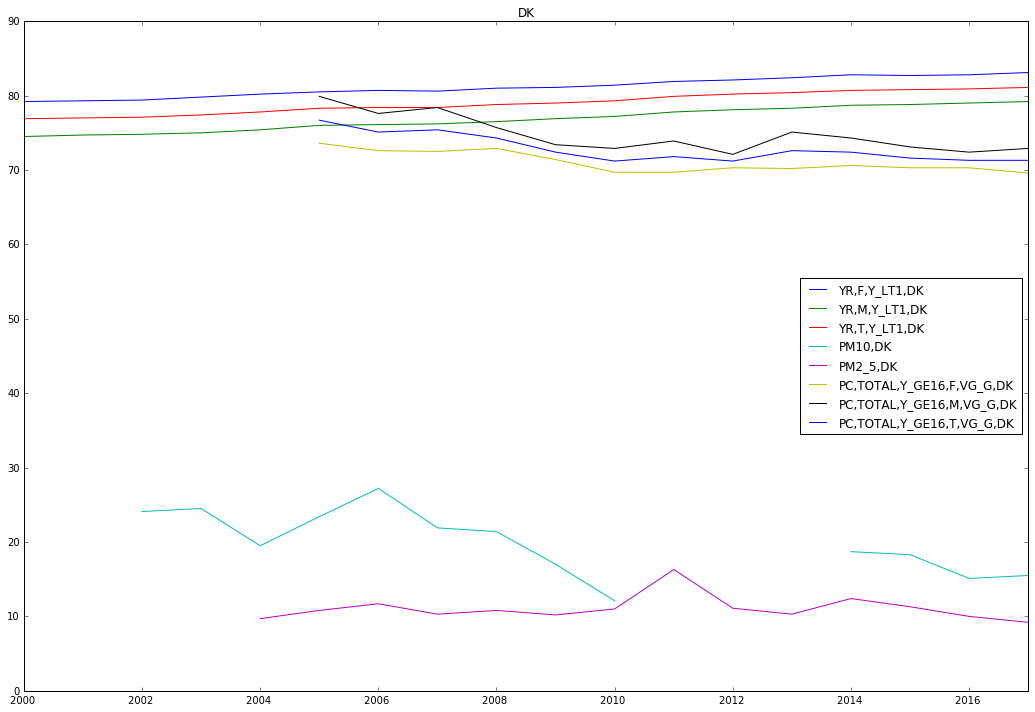

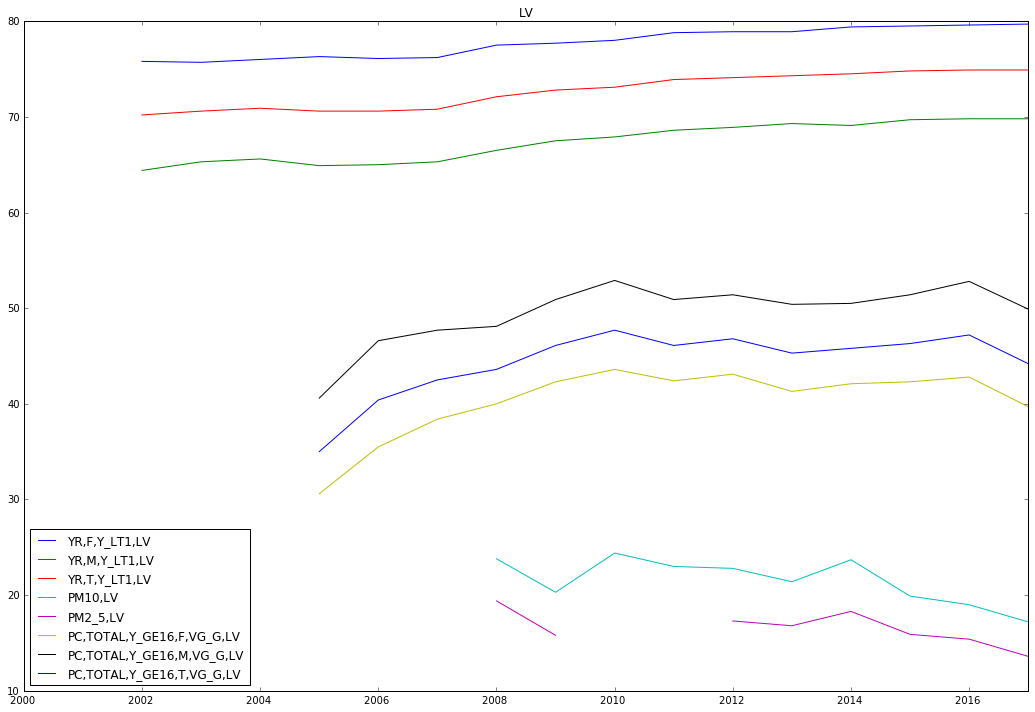

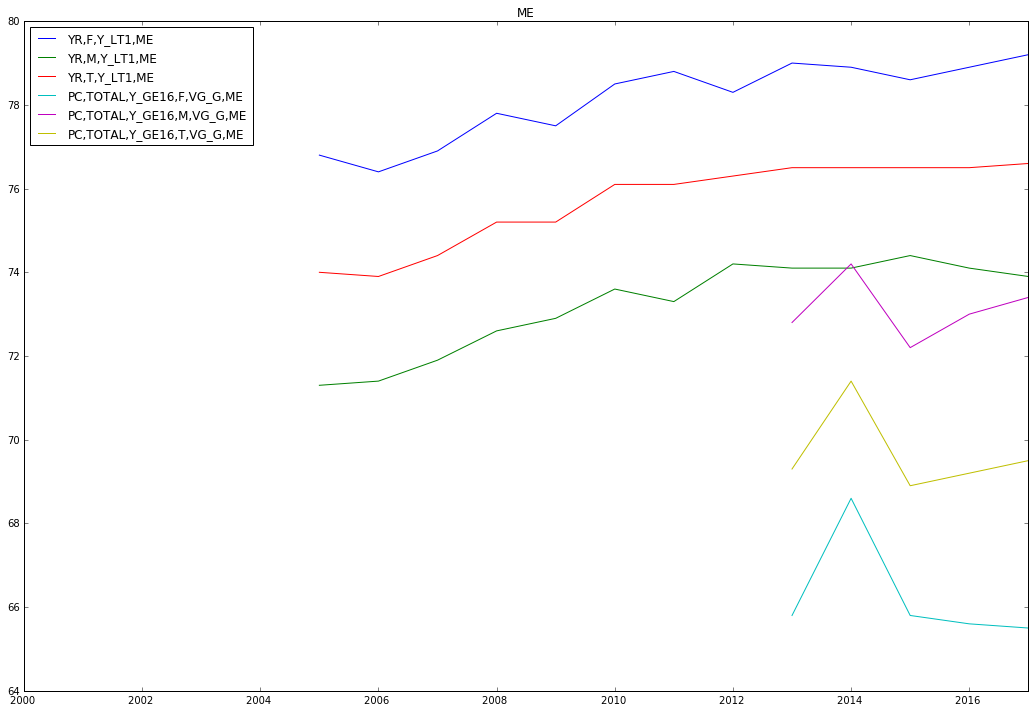

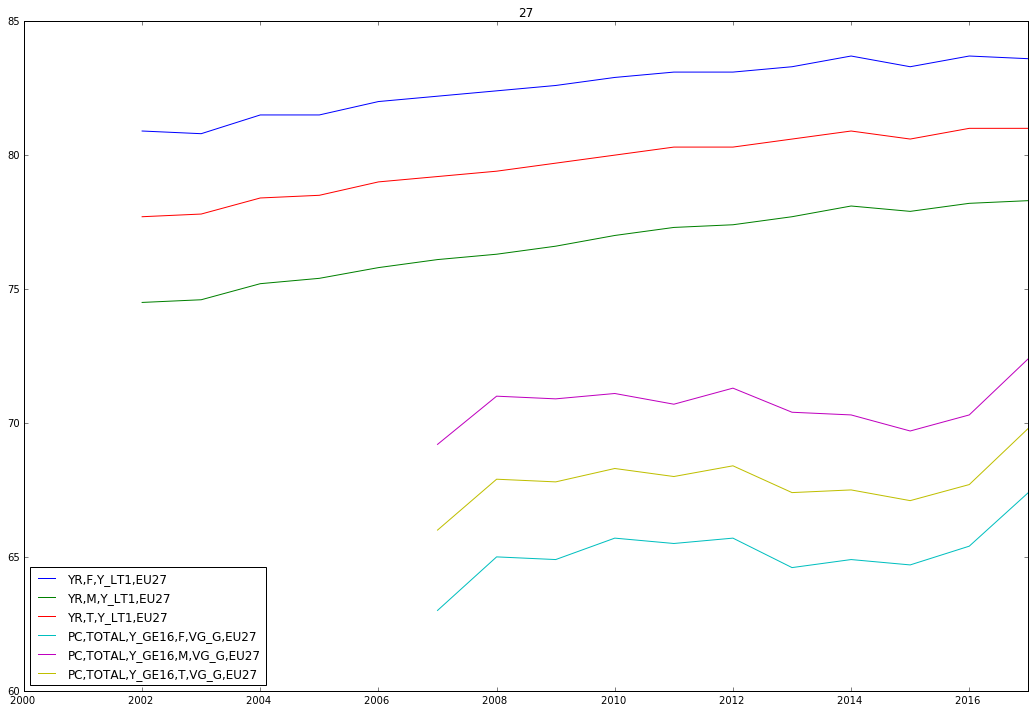

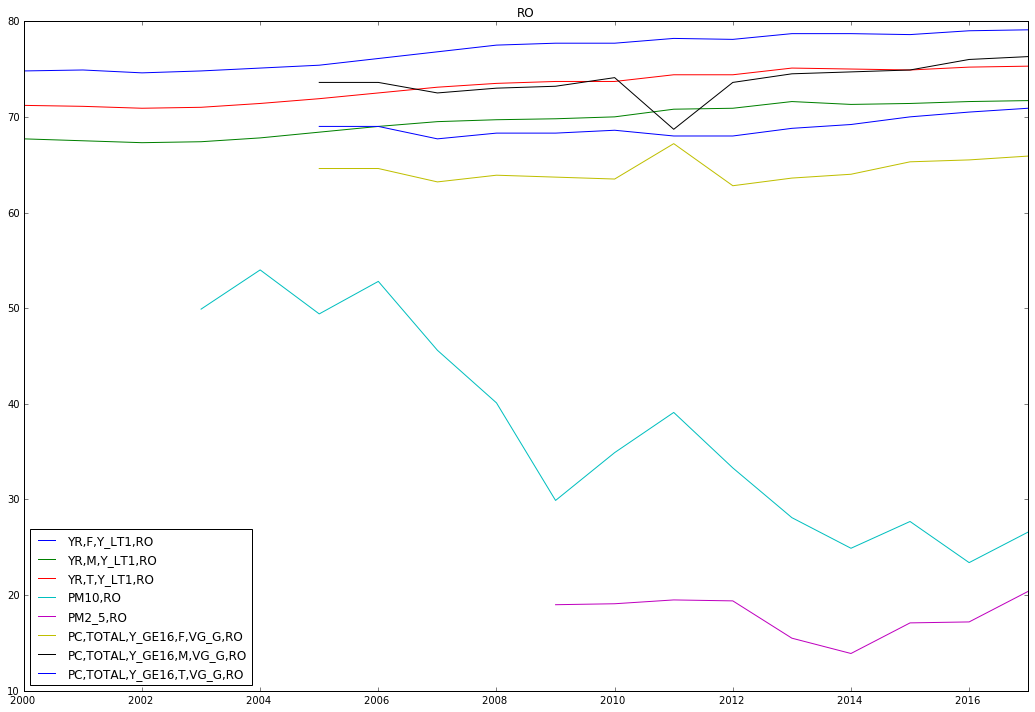

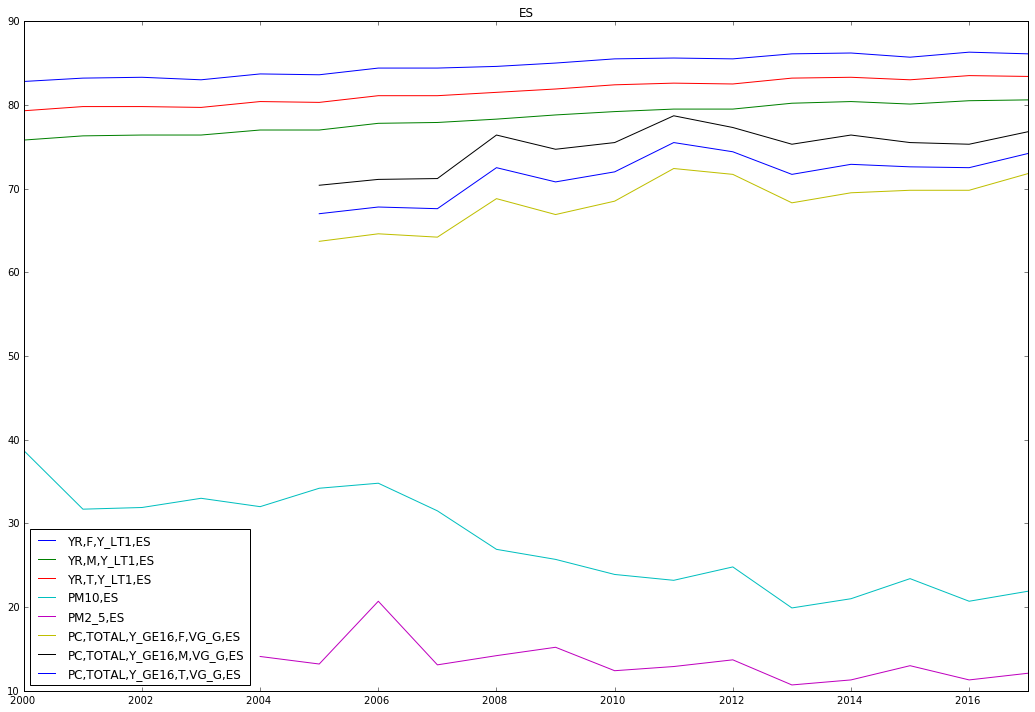

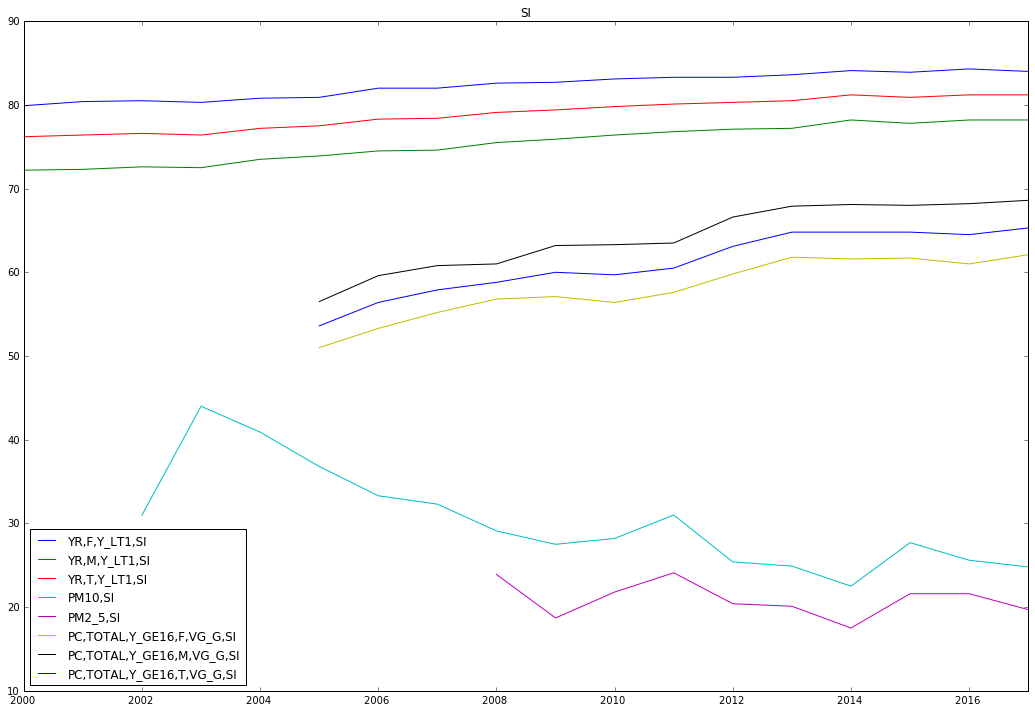

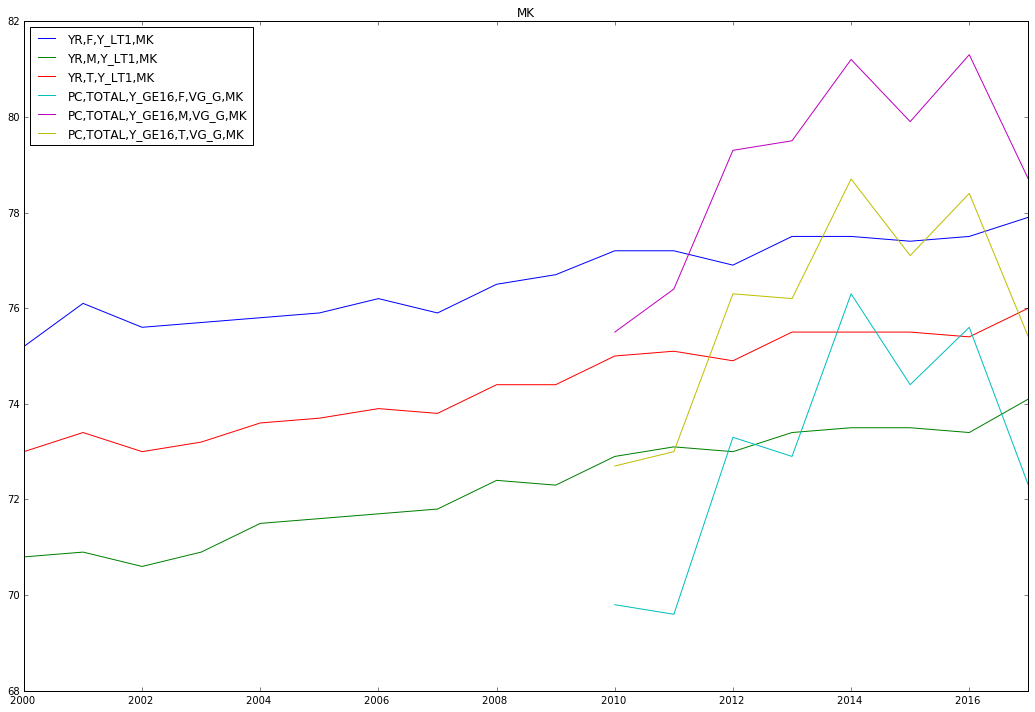

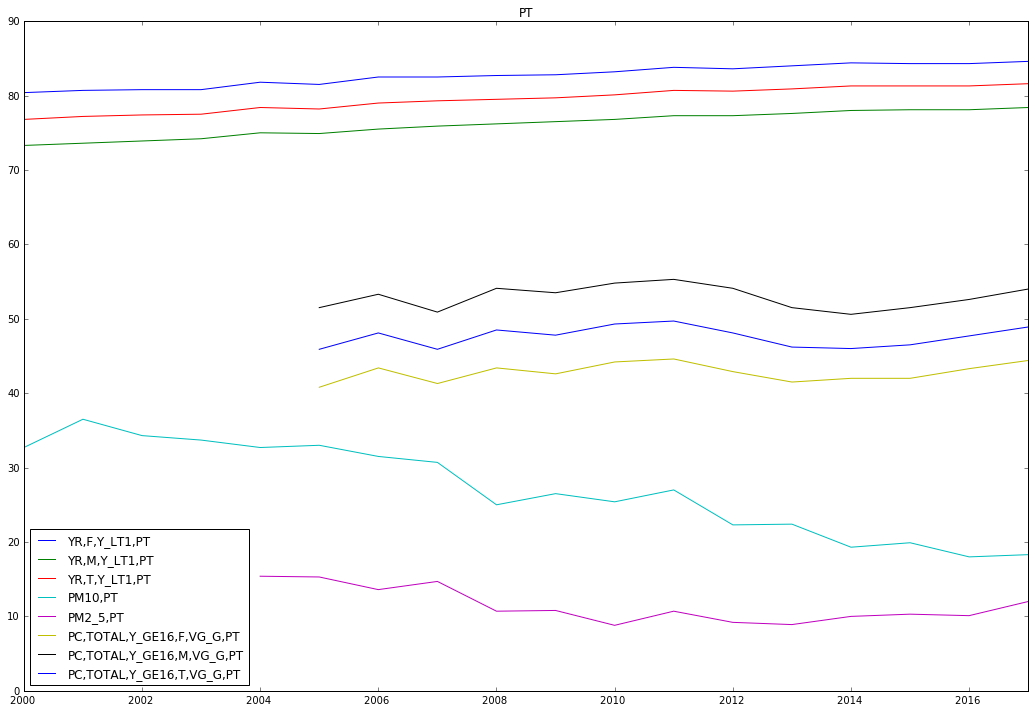

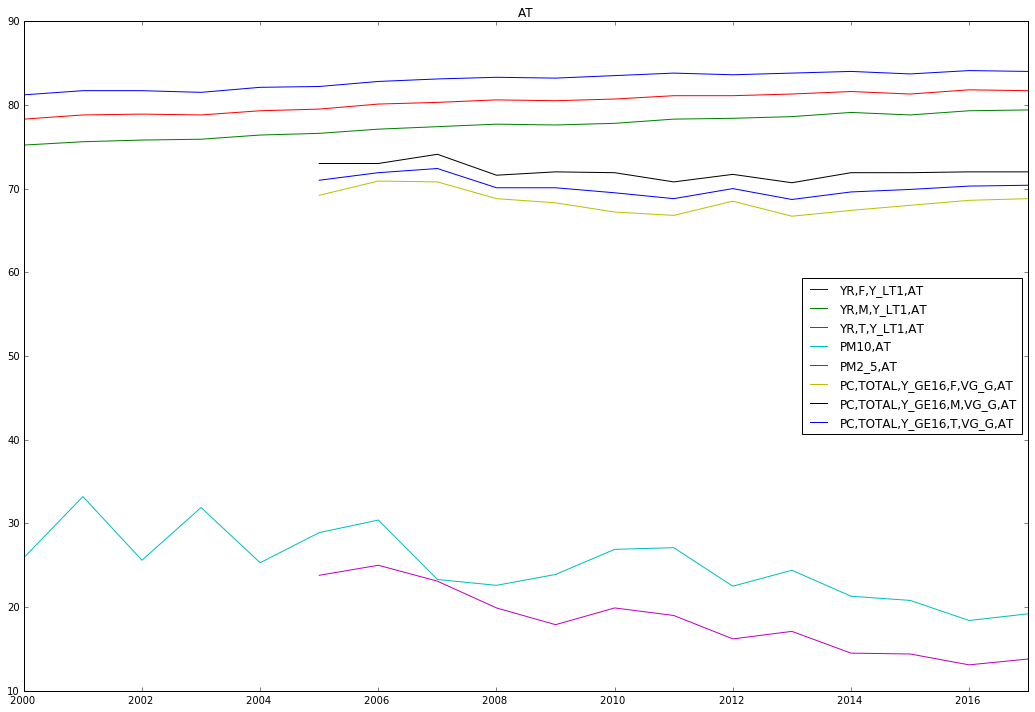

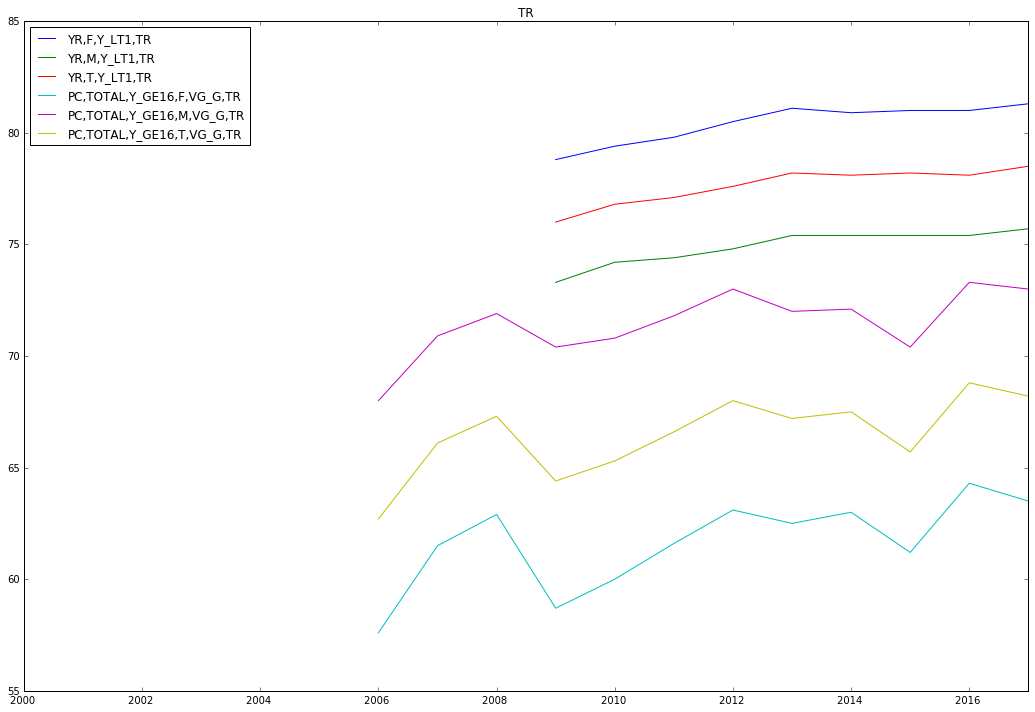

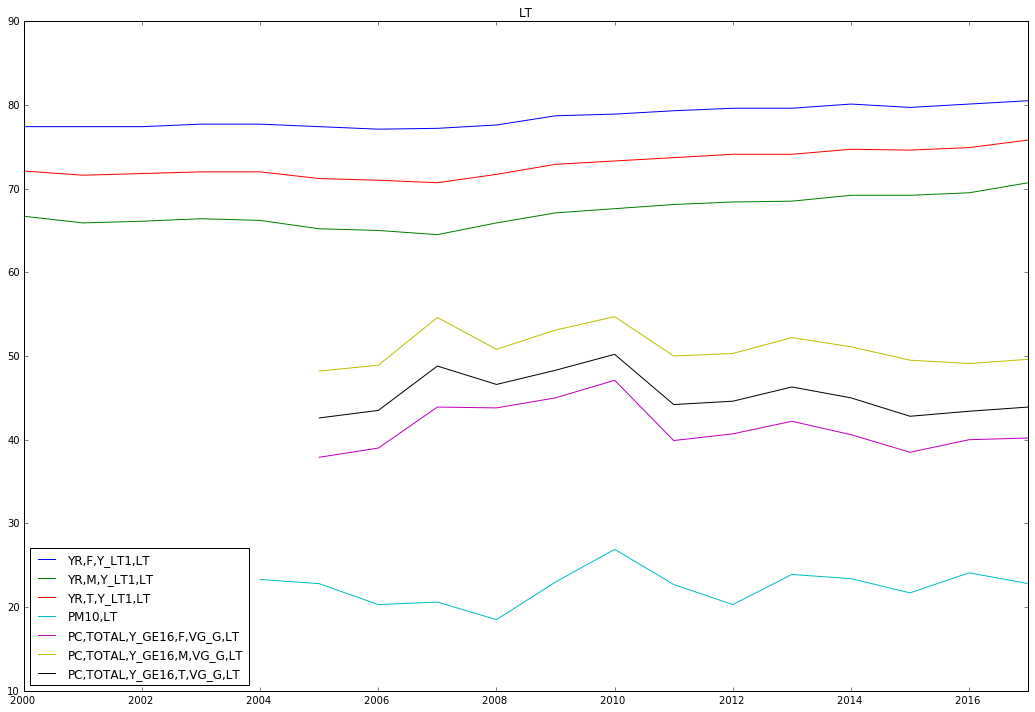

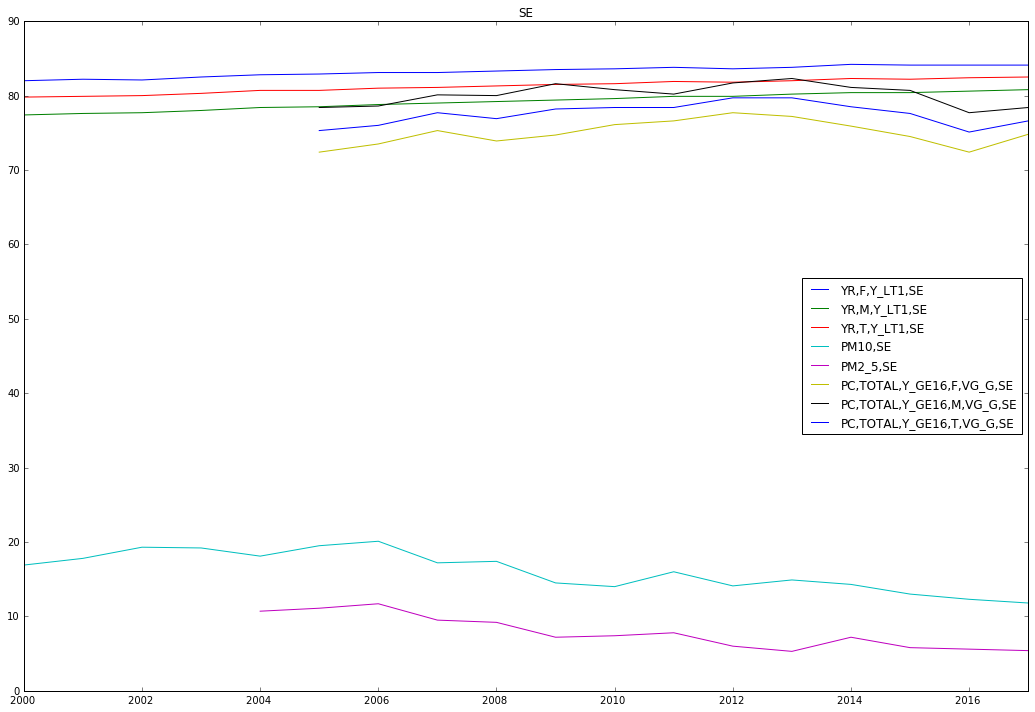

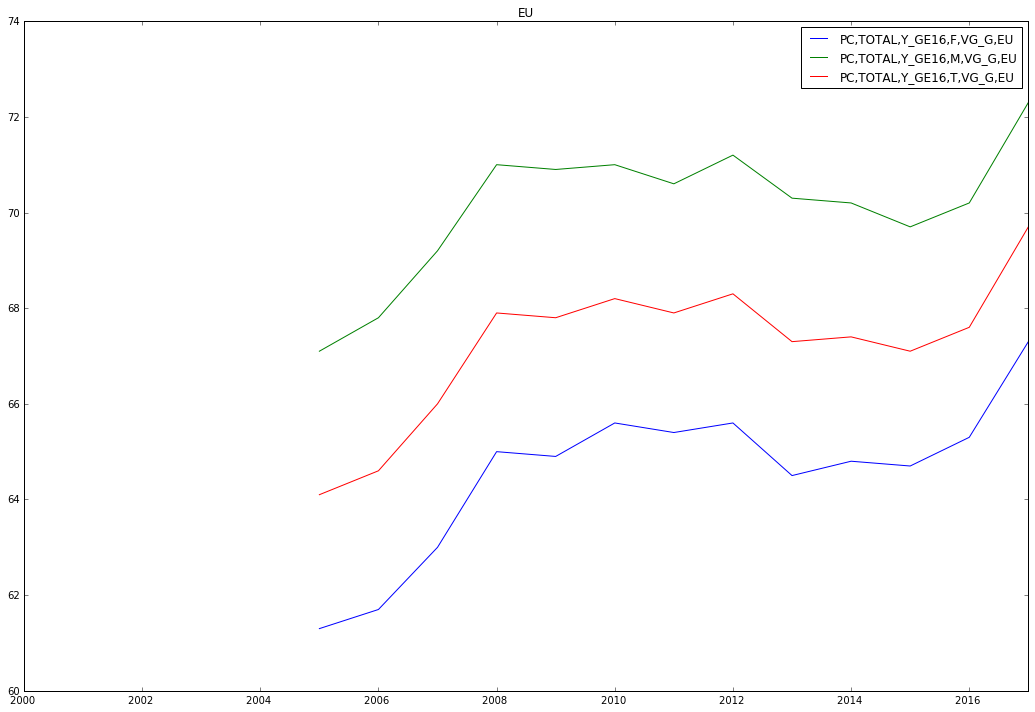

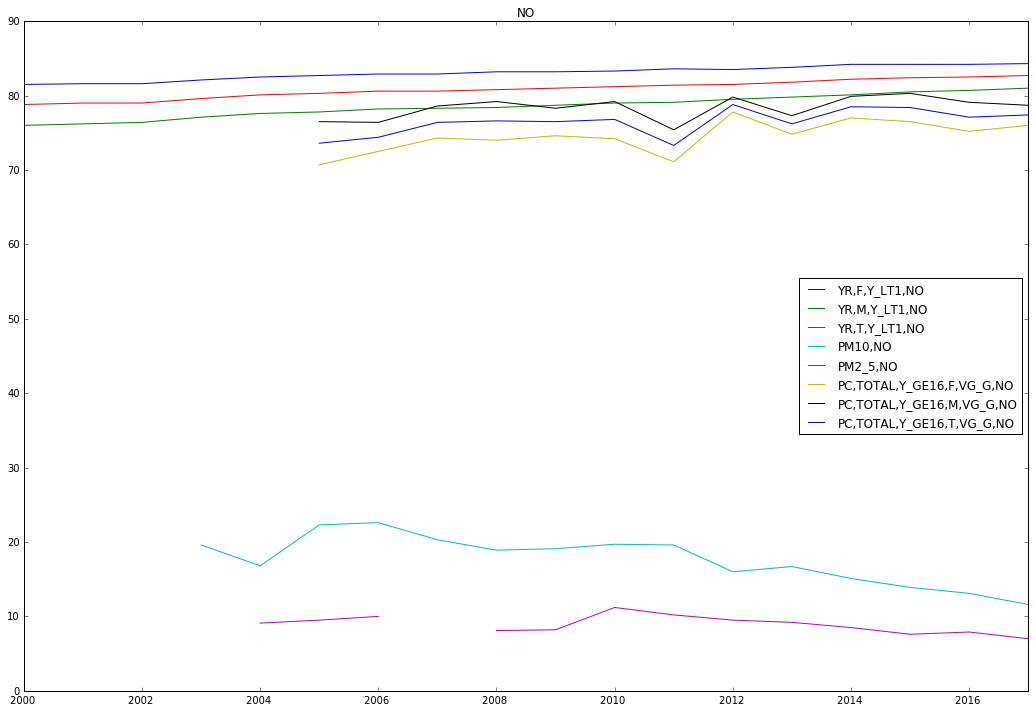

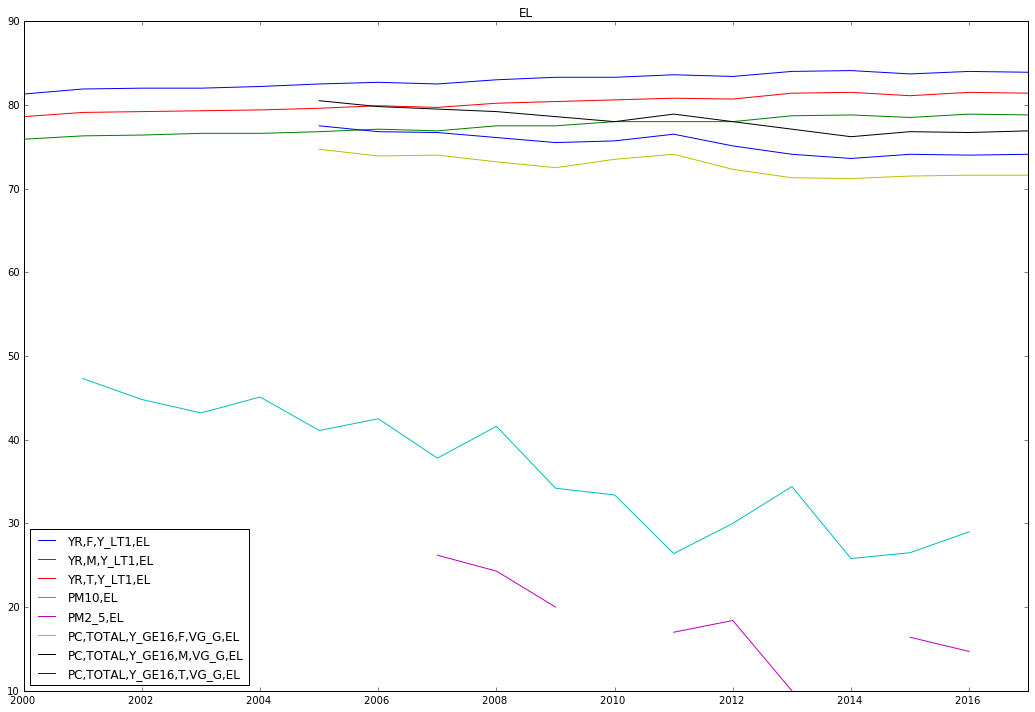

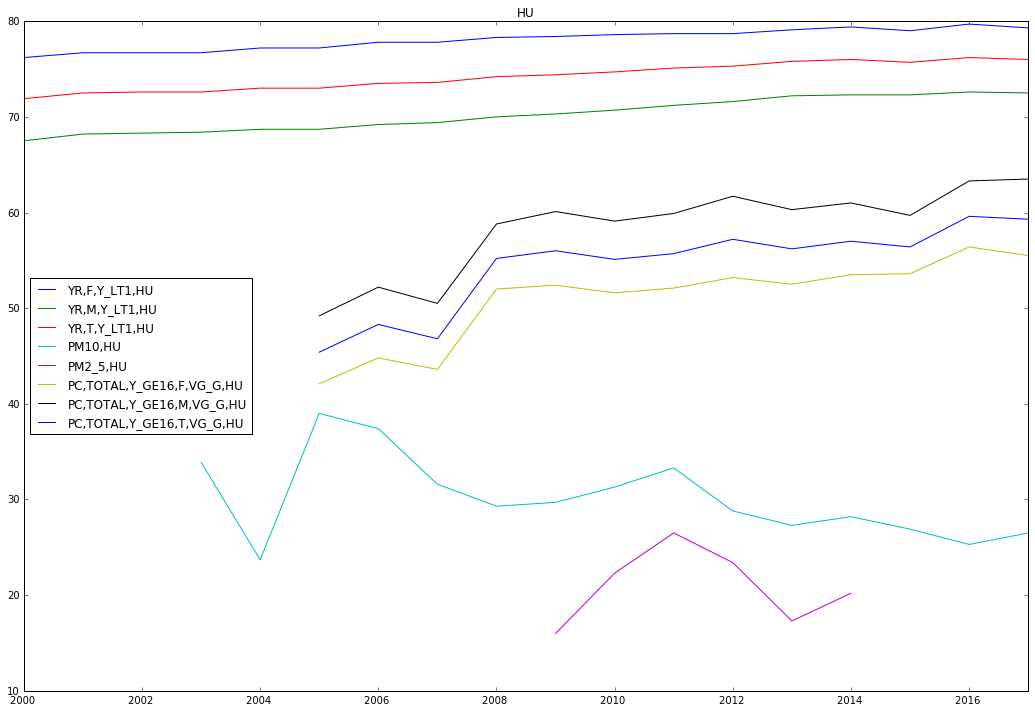

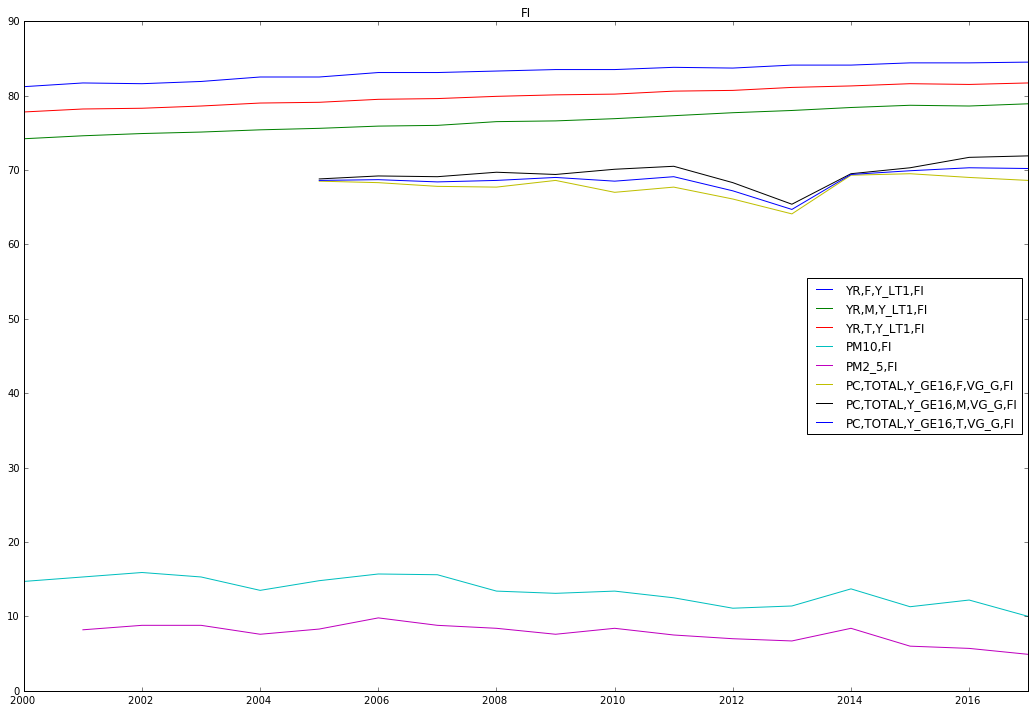

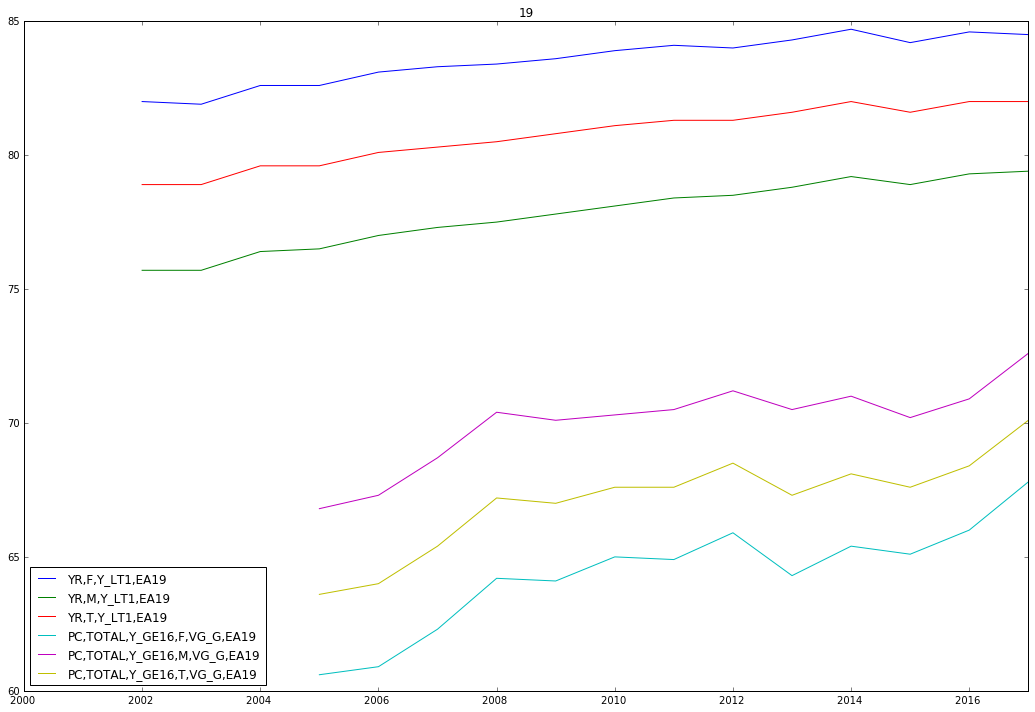

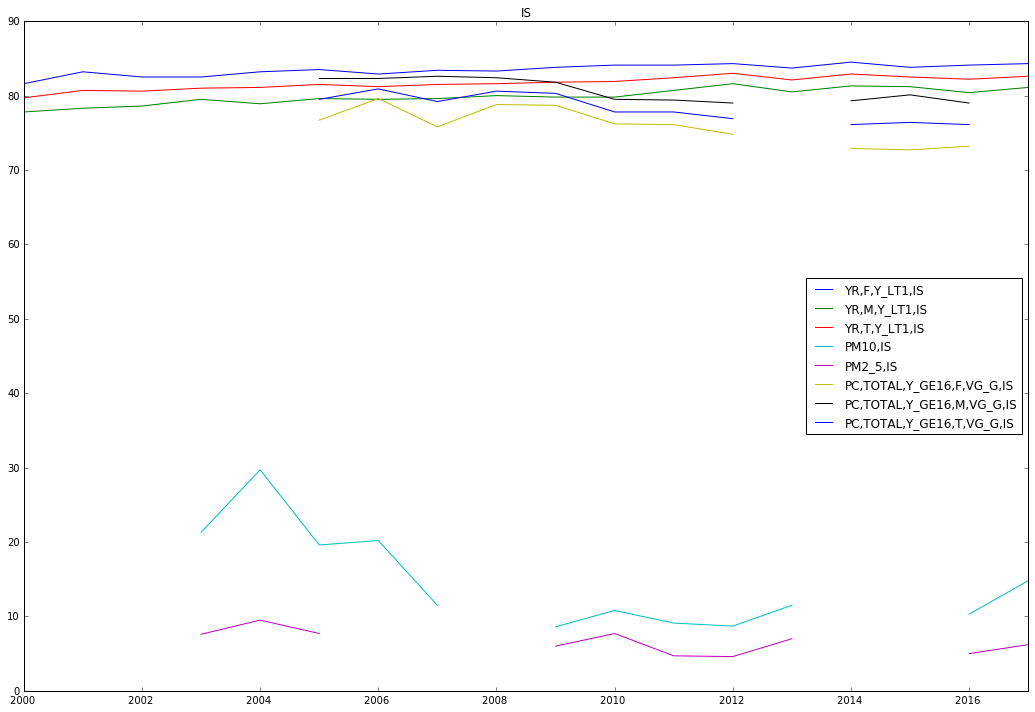

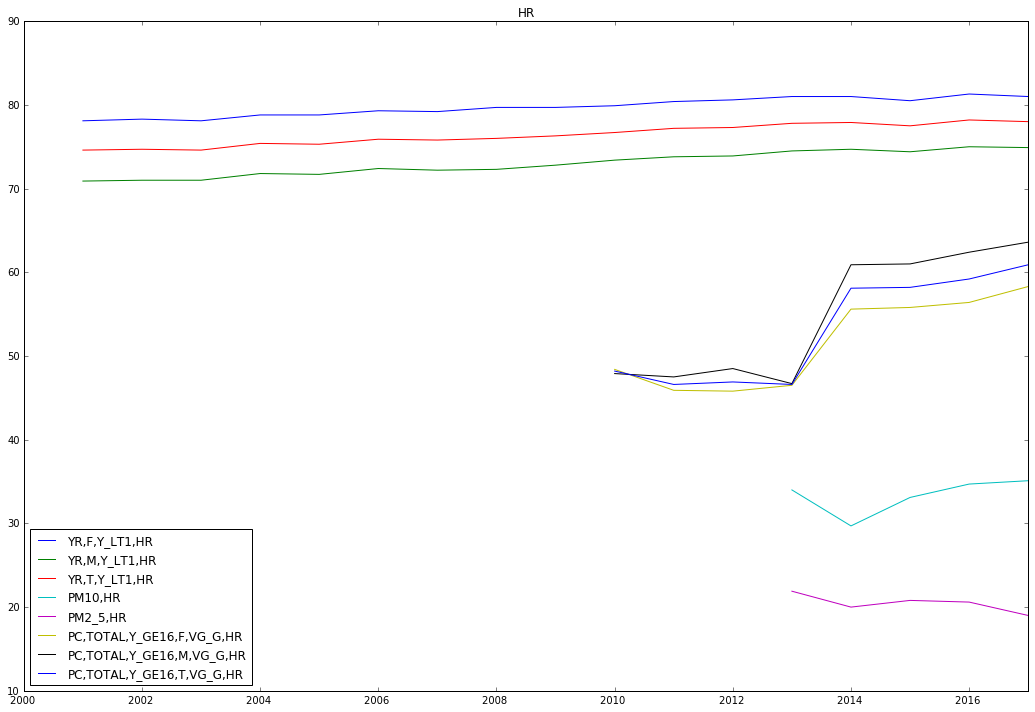

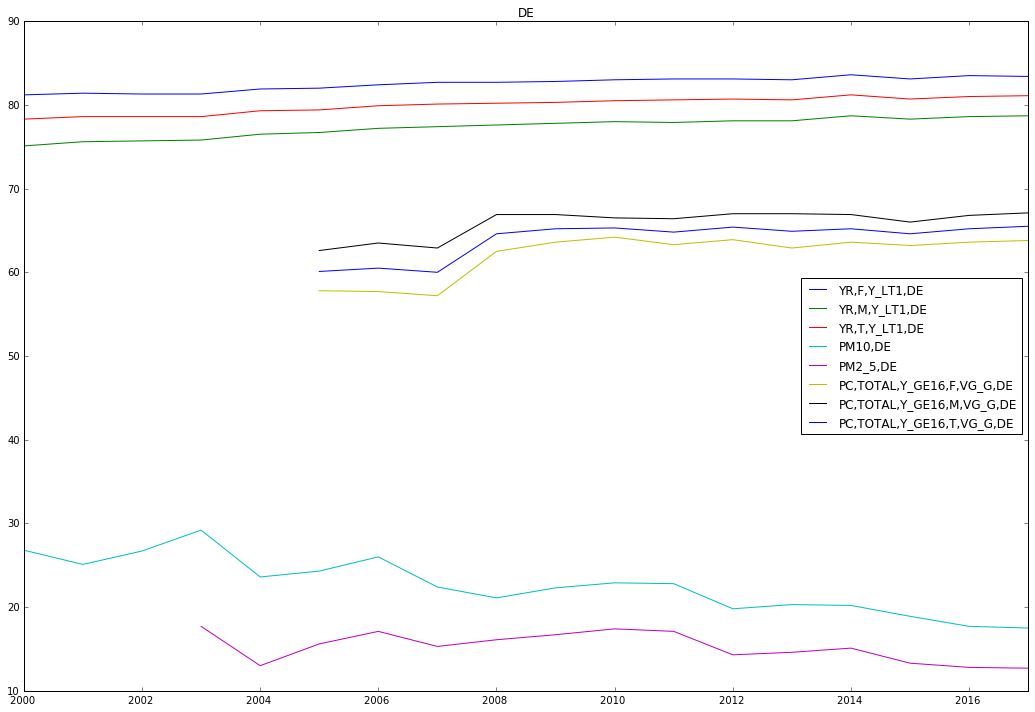

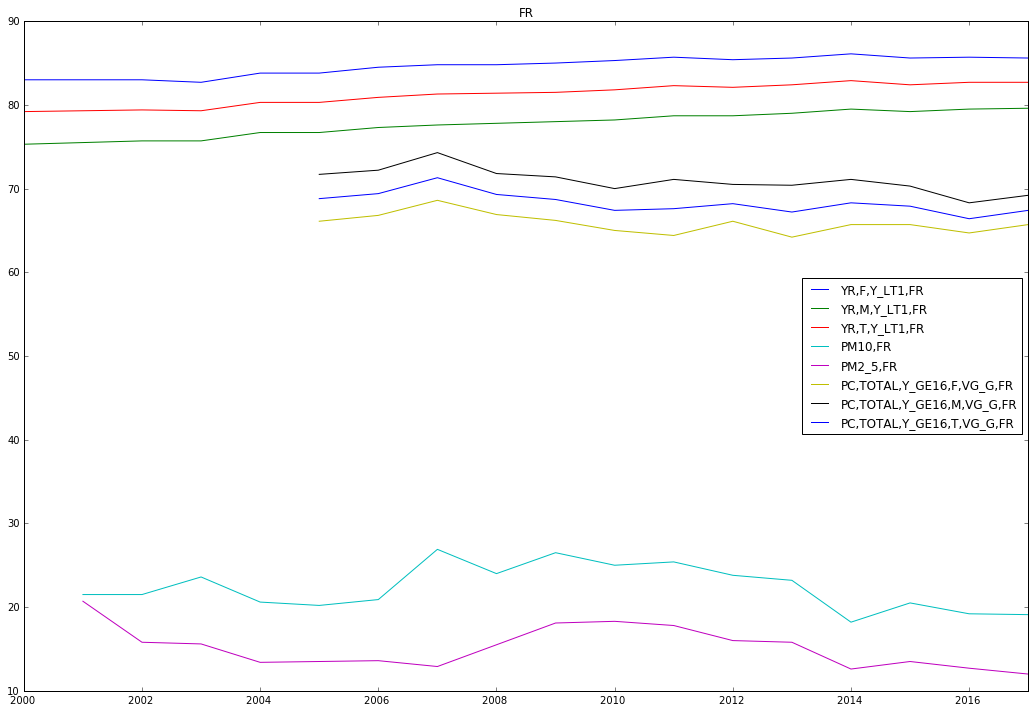

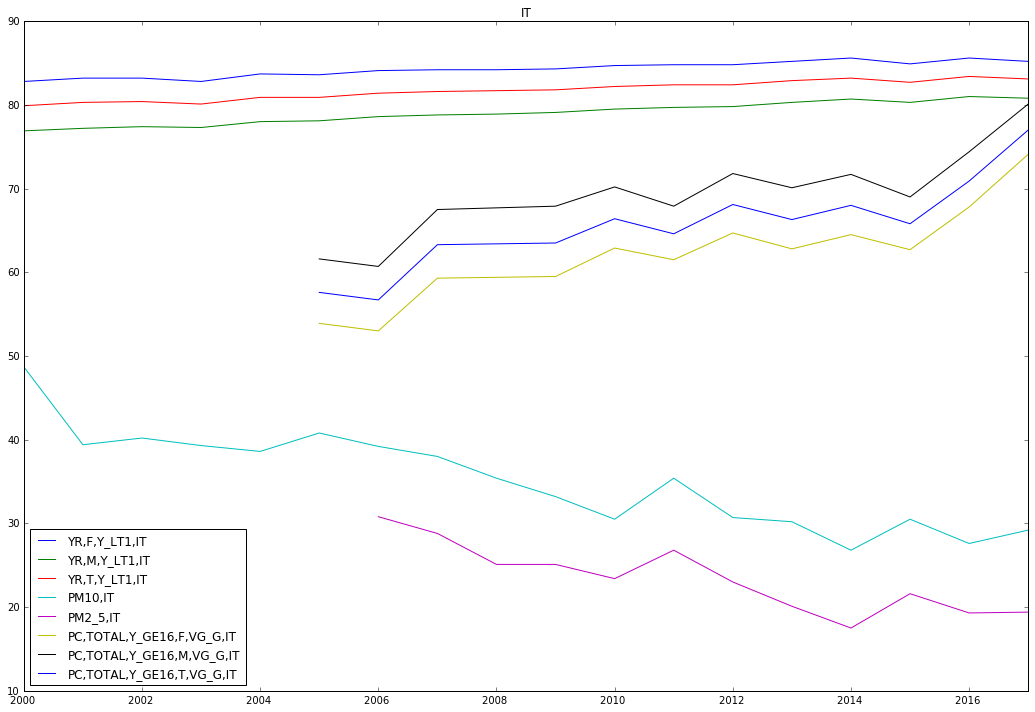

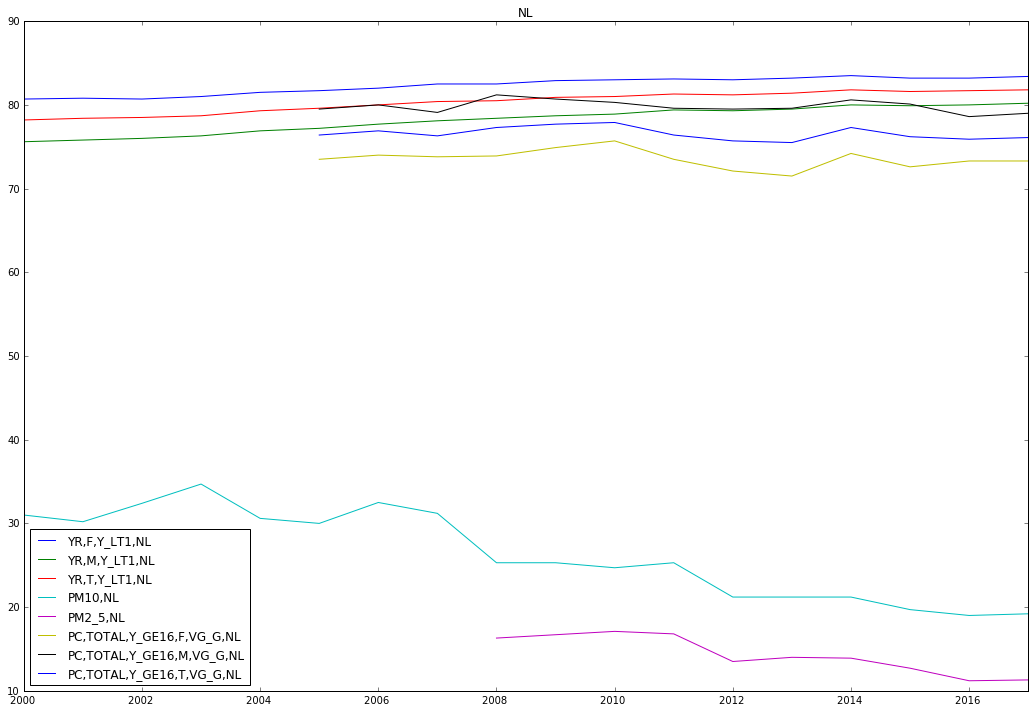

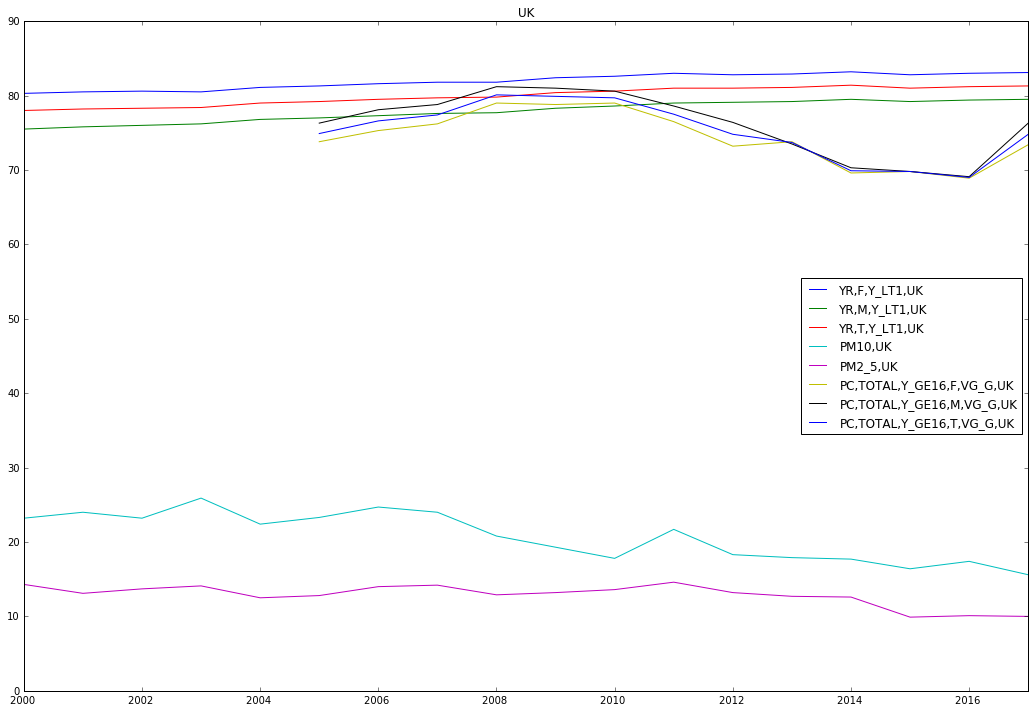

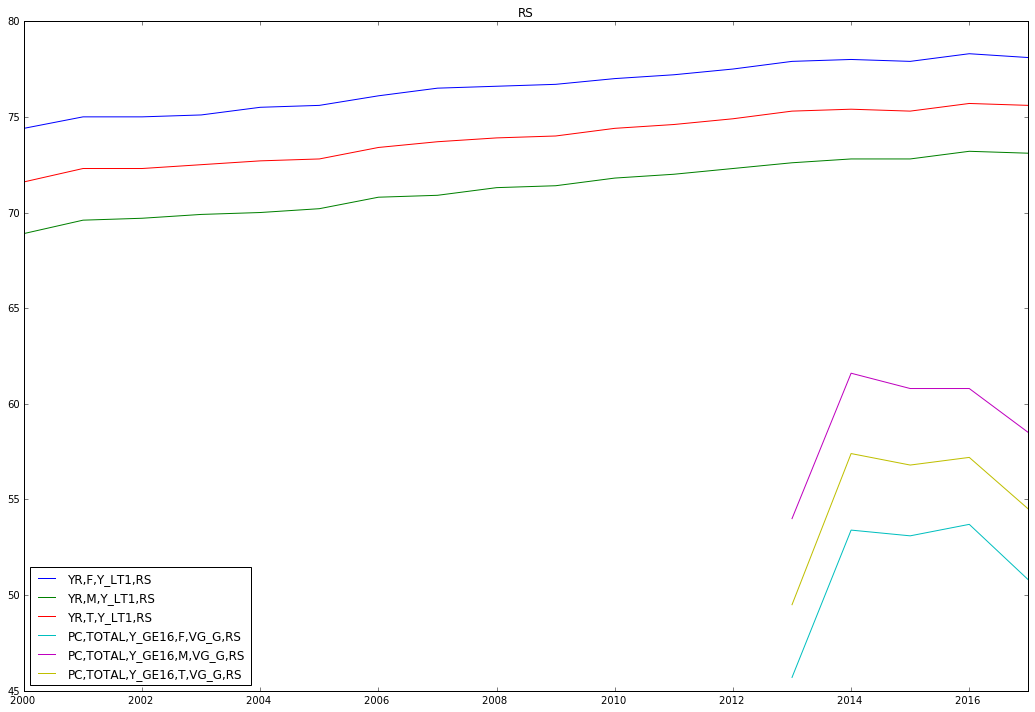

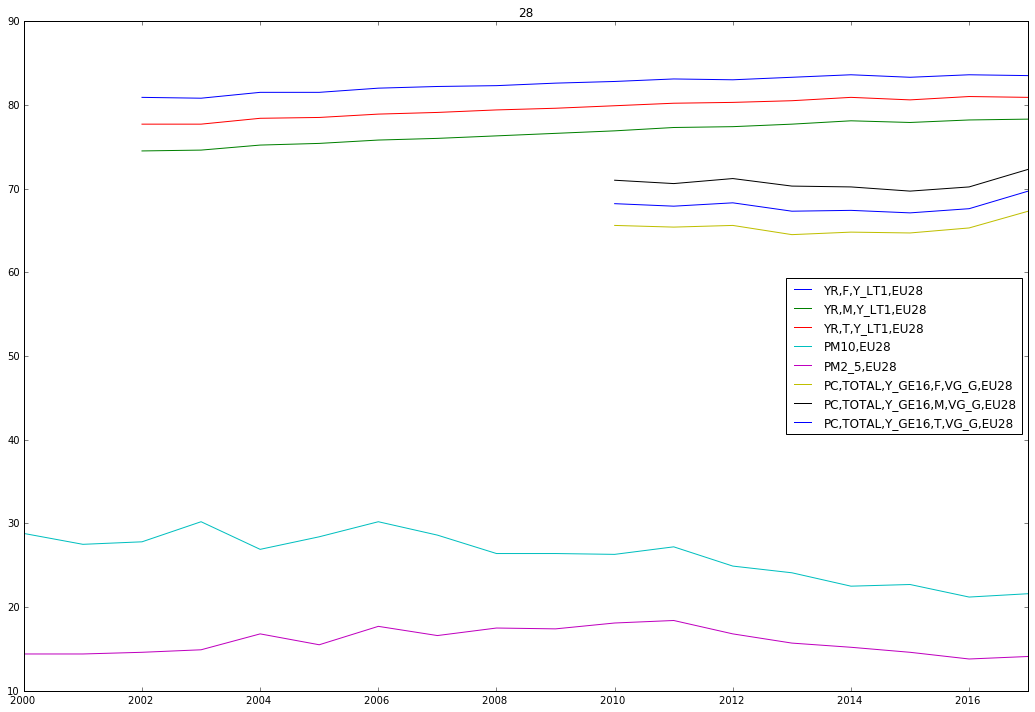

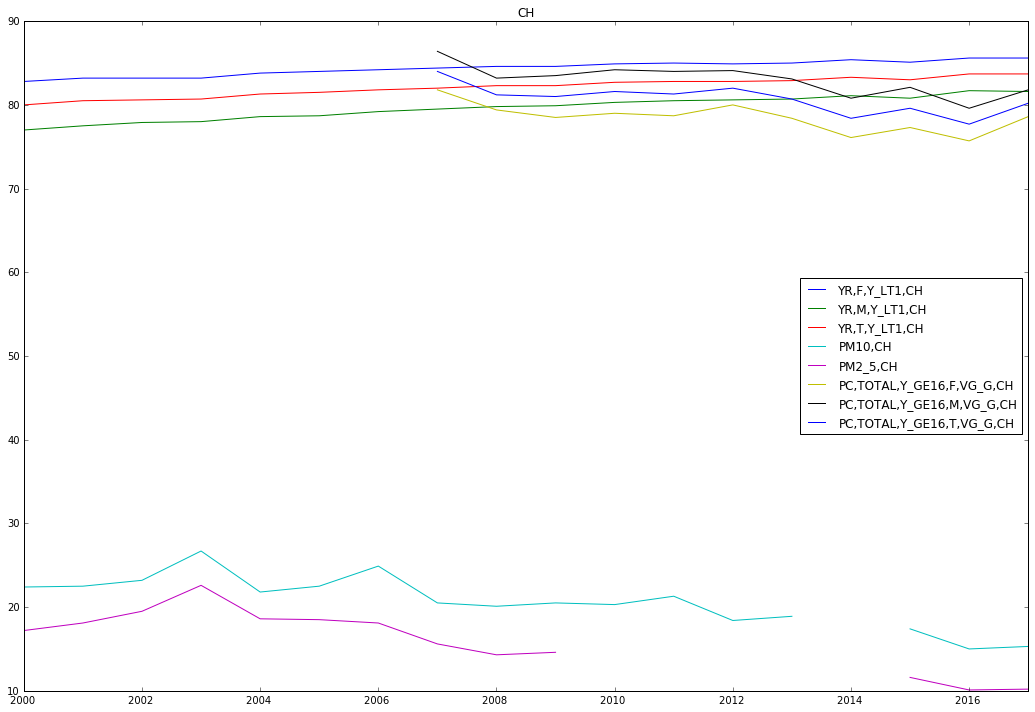

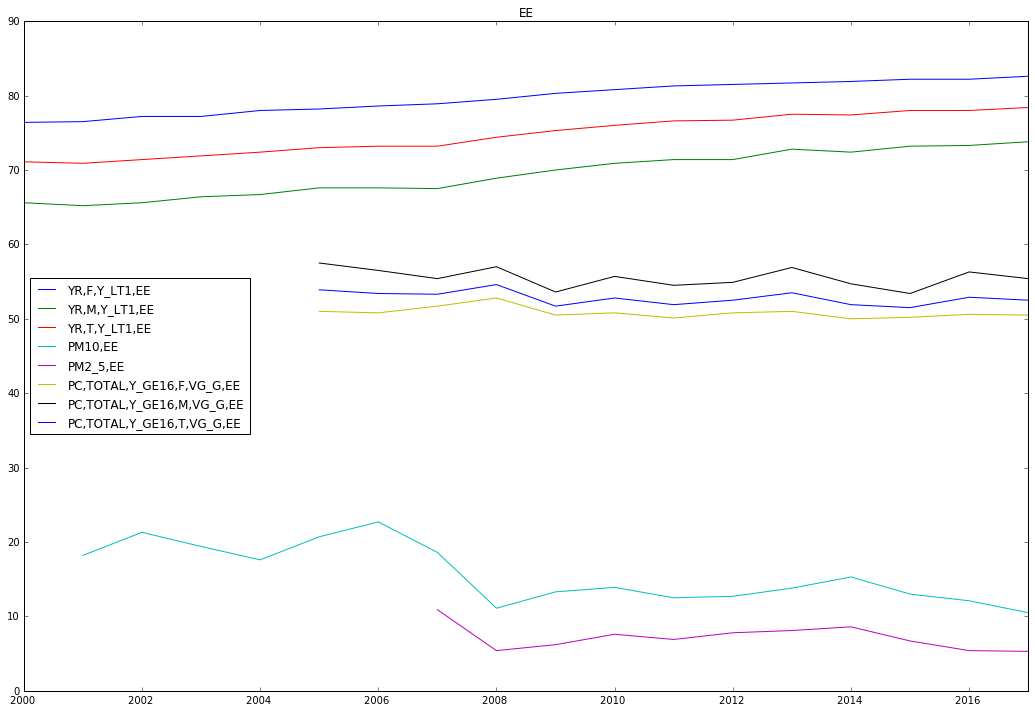

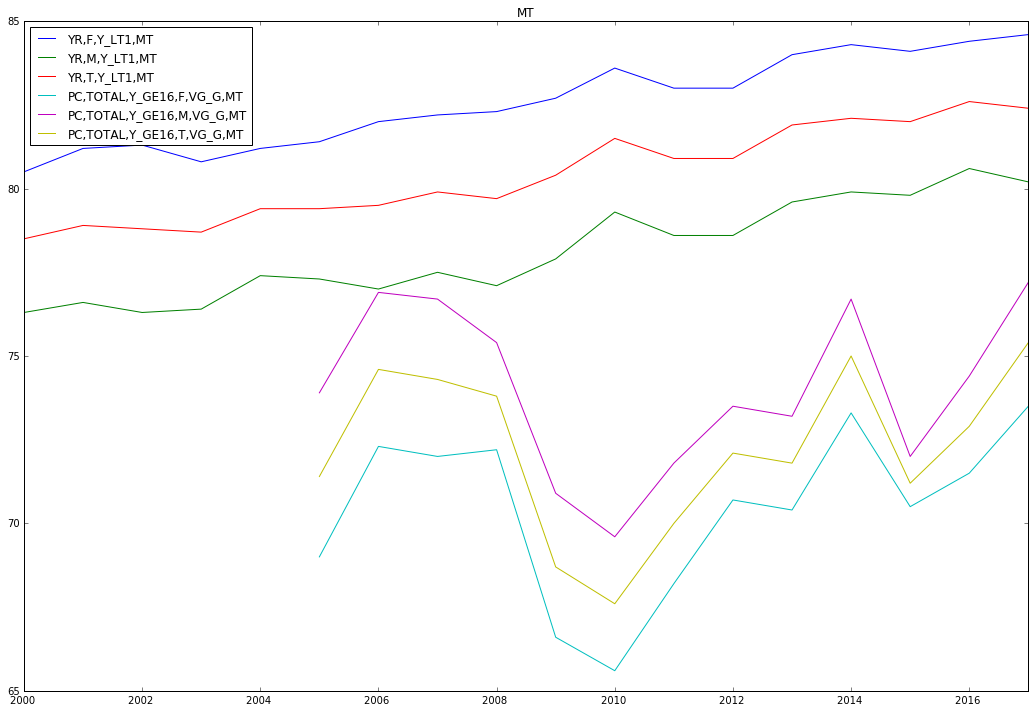

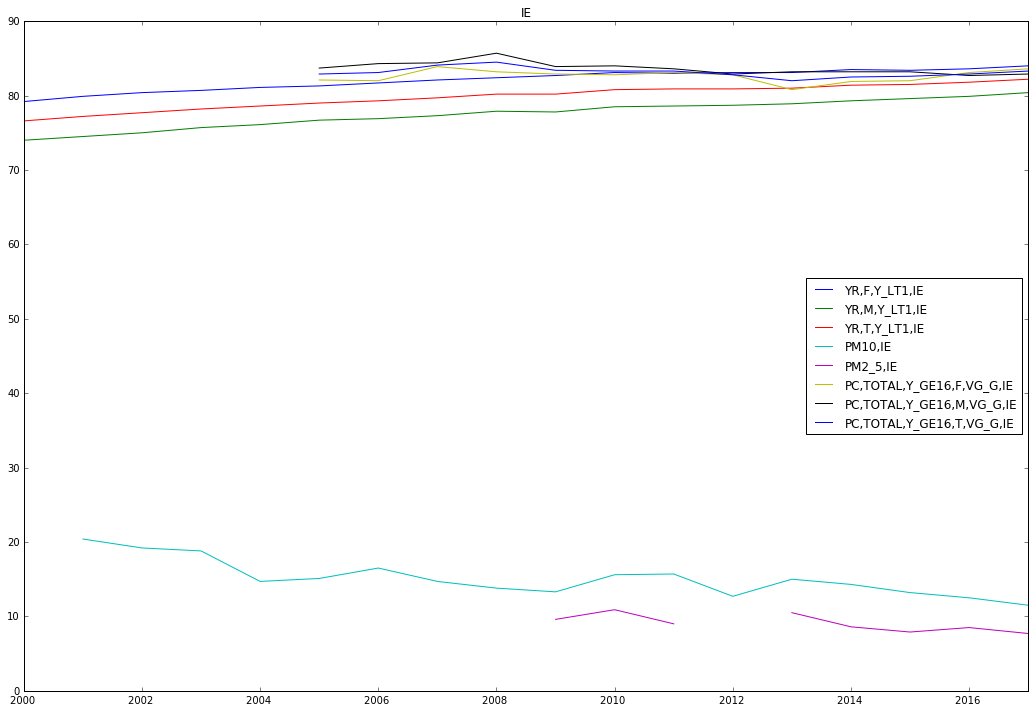

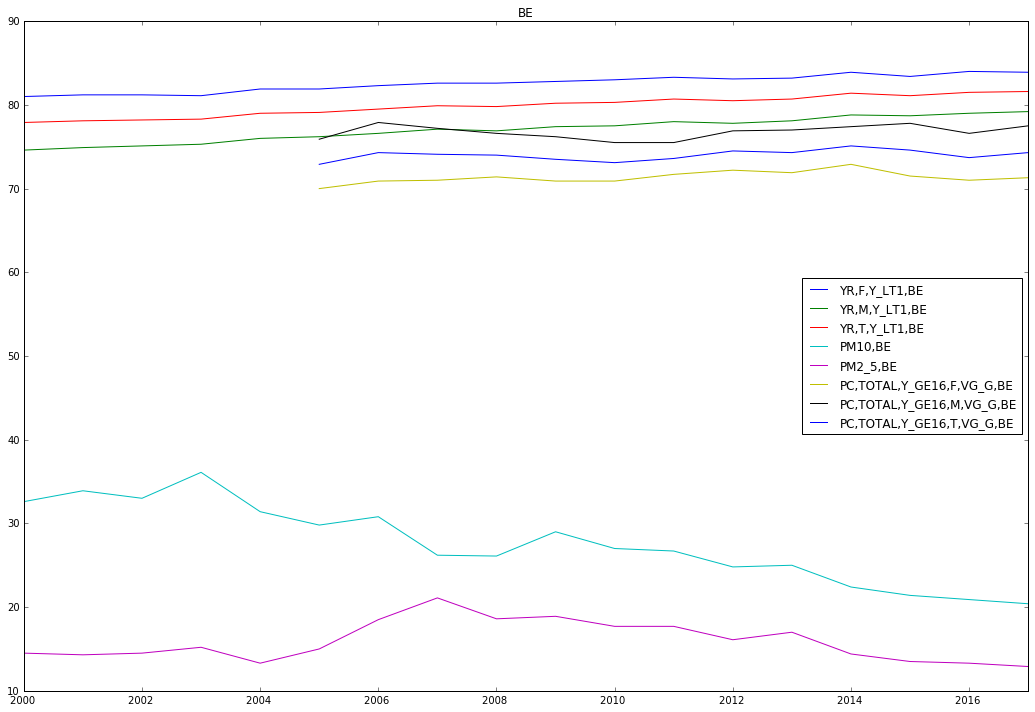

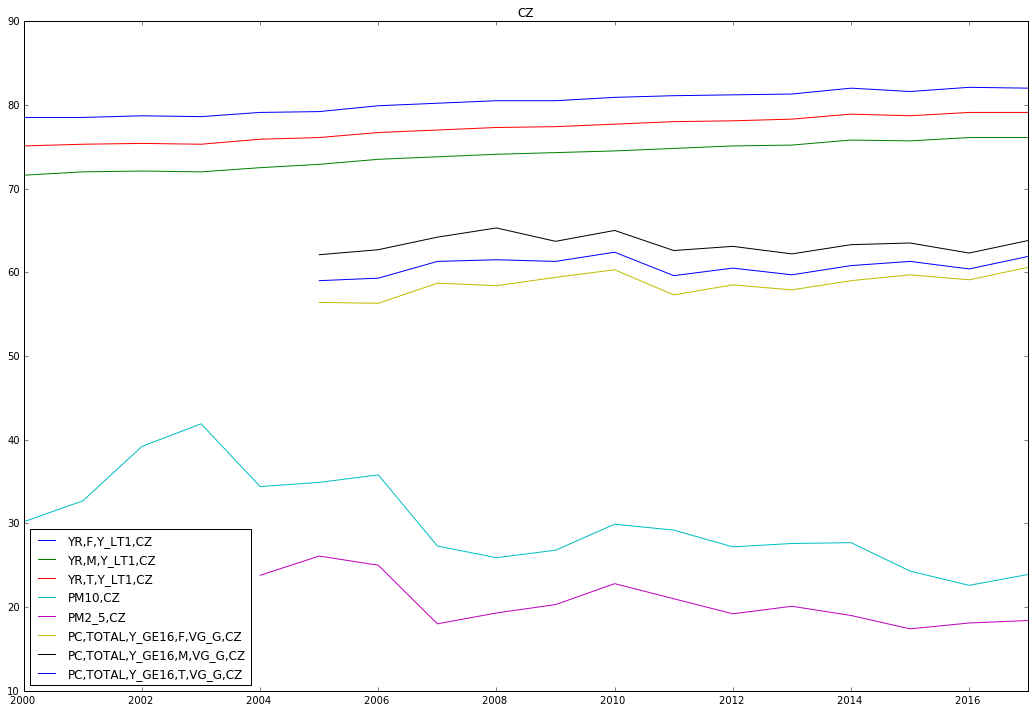

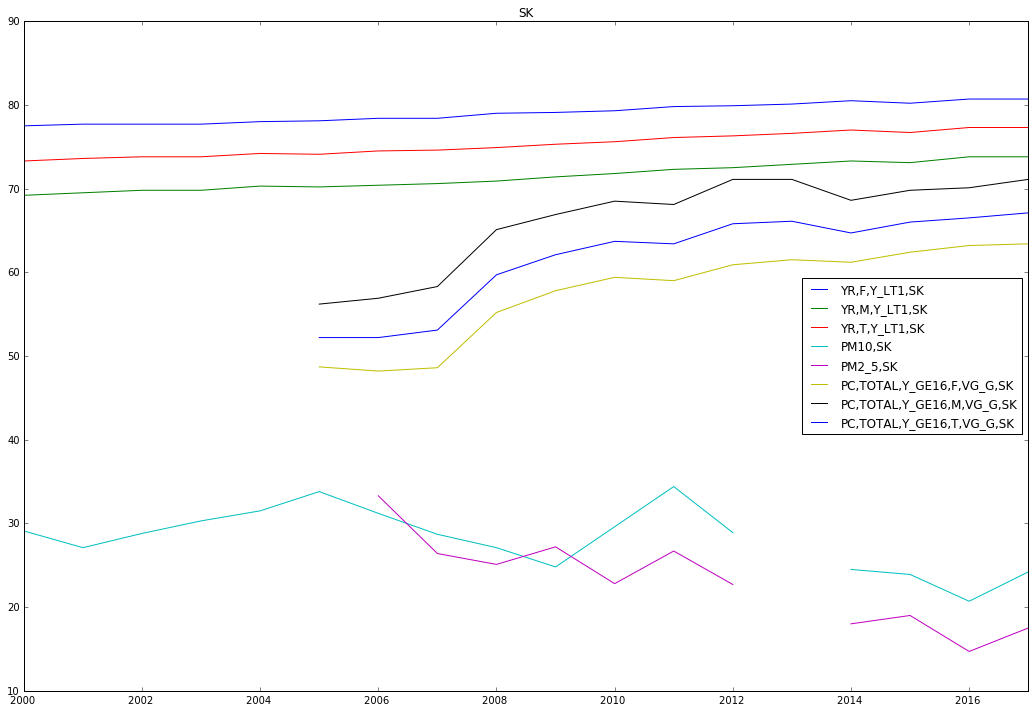

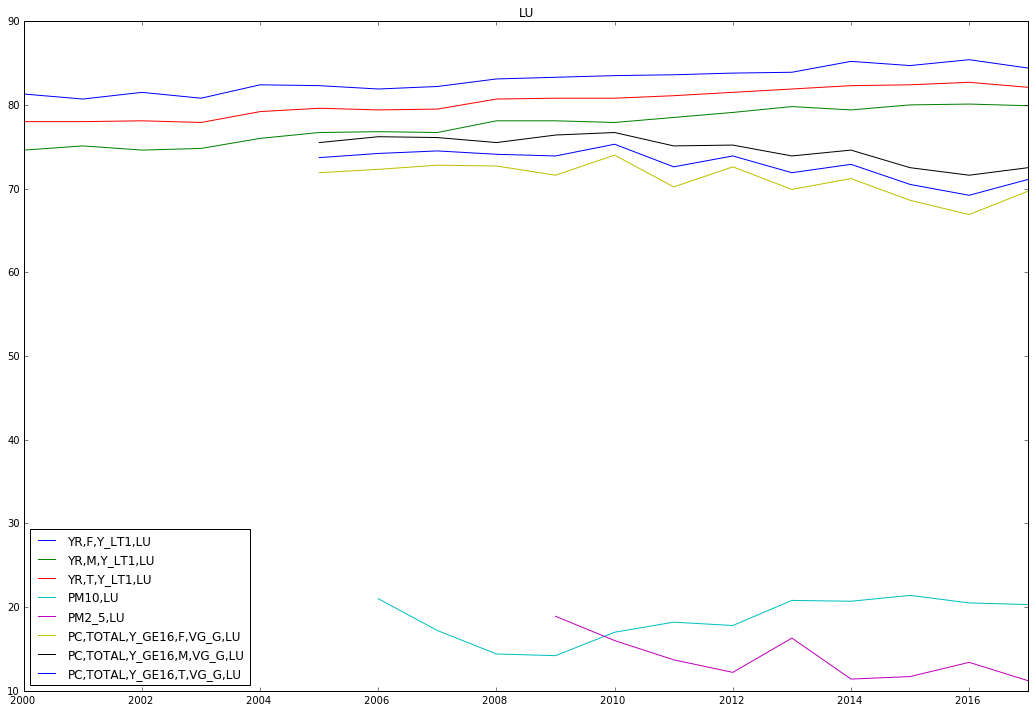

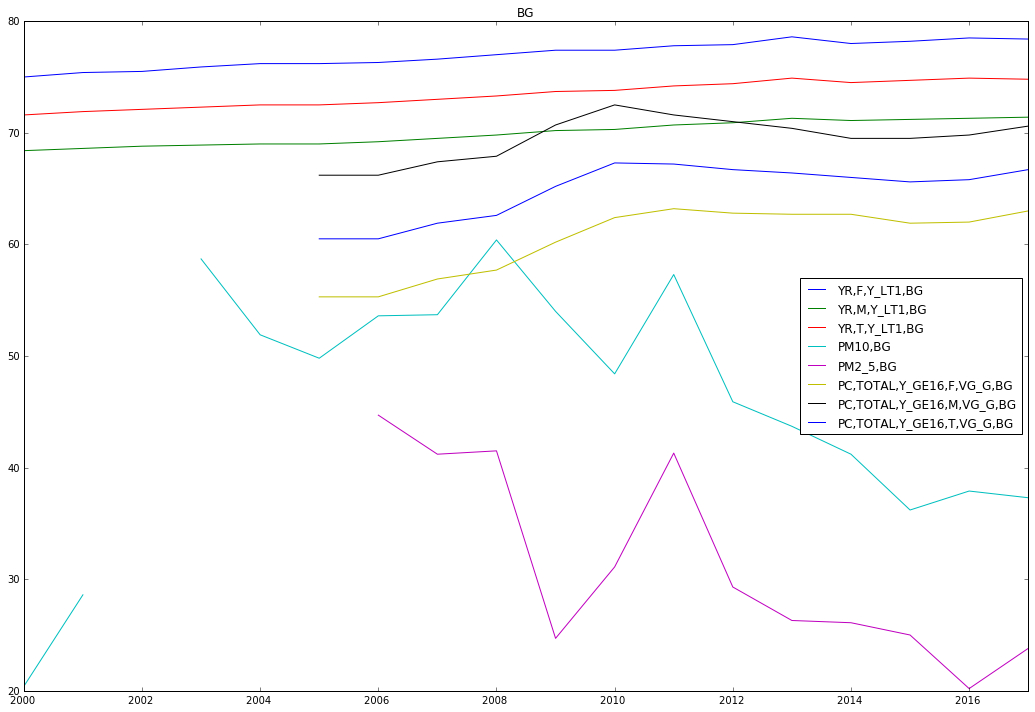

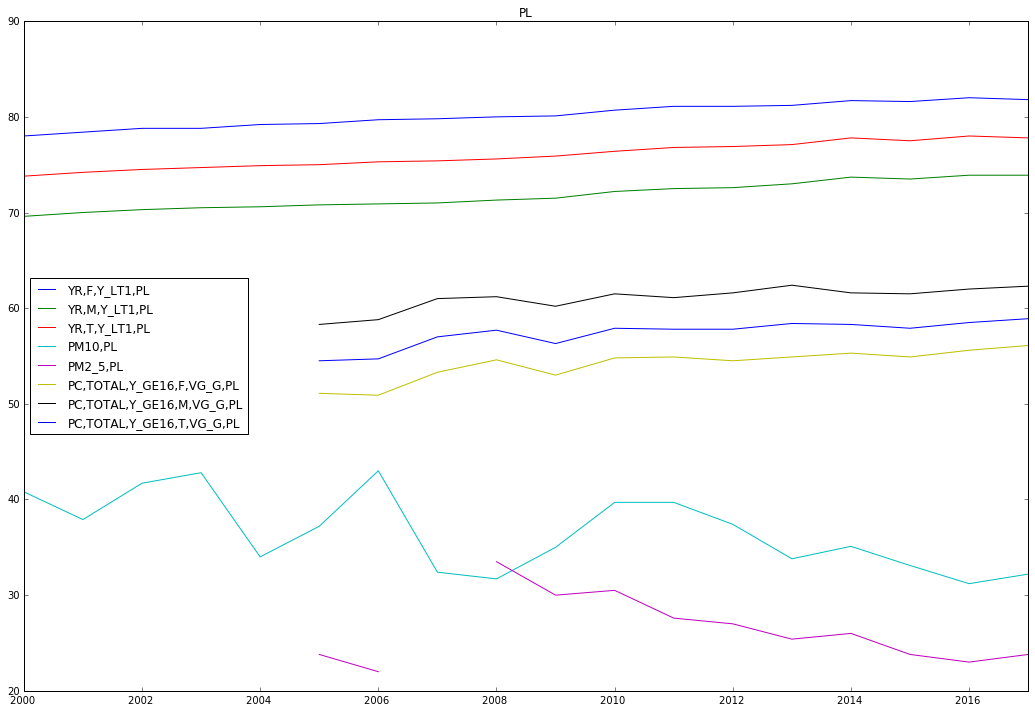

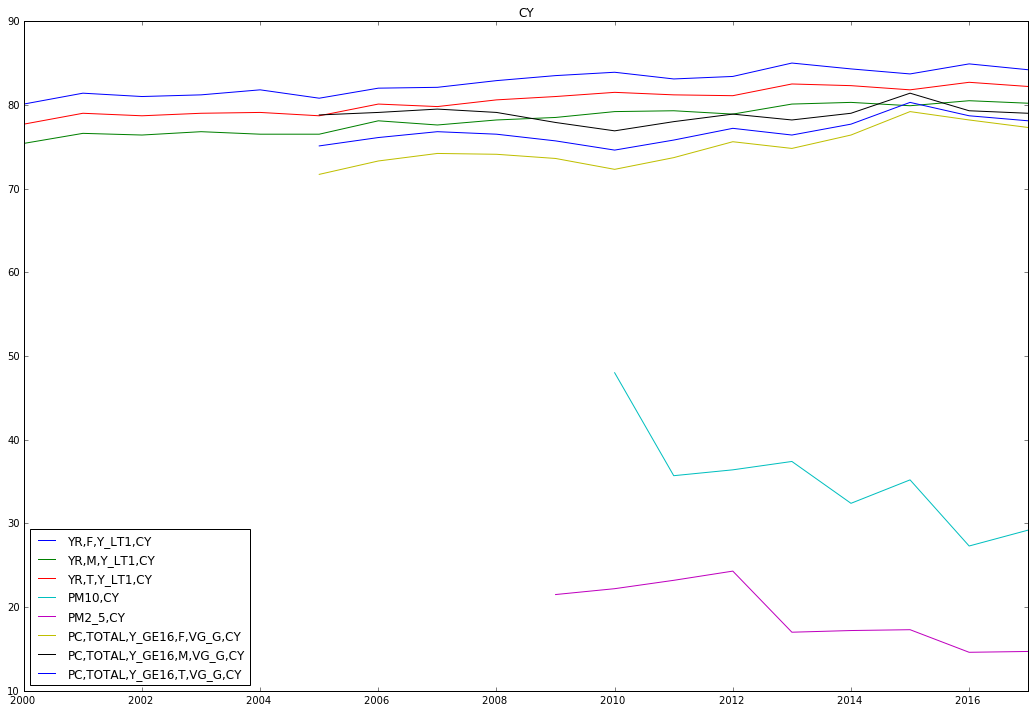

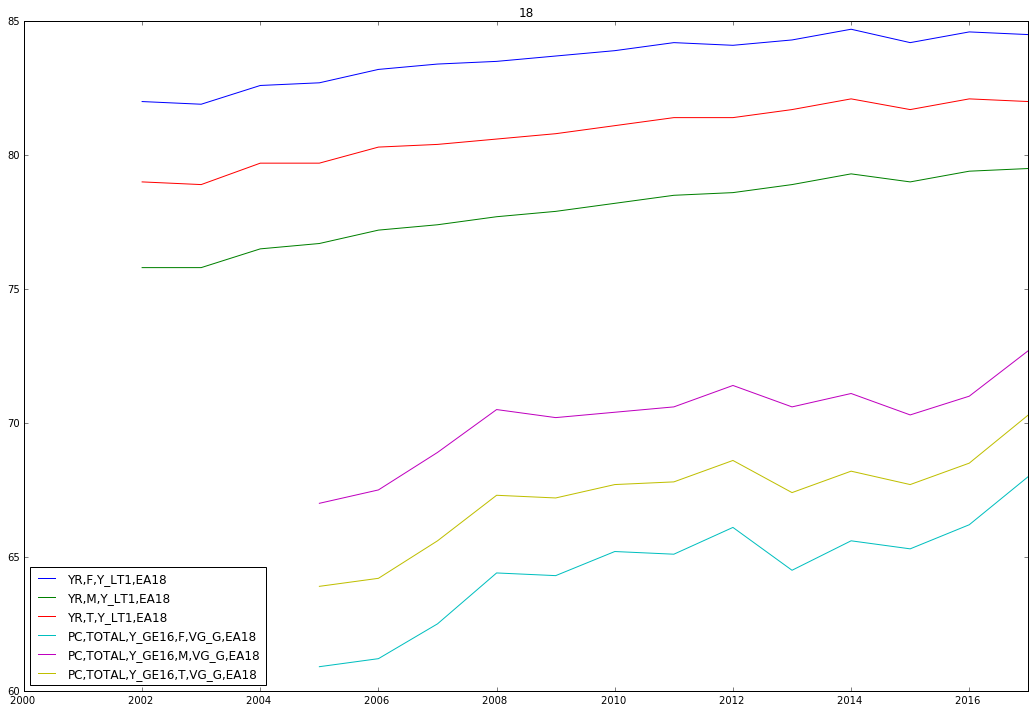

In [768]:
#Create one entry per country
for country_abr in countires_abr:
    indexes_life = list(filter(lambda x: x.endswith(country_abr), life_expectancy_at_birth_by_sex.index.values.tolist()))
    a = life_expectancy_at_birth_by_sex.loc[indexes_life,].T
    a = a.applymap(lambda x: str(x).split(' ')[0])
    
    indexes_exposure_air = list(filter(lambda x: x.endswith(country_abr), exposure_to_air_pollution_by_particulate_matter.index.values.tolist()))
    b = exposure_to_air_pollution_by_particulate_matter.loc[indexes_exposure_air,].T
    b = b.applymap(lambda x: str(x).split(' ')[0])
    
    indexes_good_perceived_health = list(filter(lambda x: x.endswith(country_abr), share_of_people_with_good_perceived_health.index.values.tolist()))
    c = share_of_people_with_good_perceived_health.loc[indexes_good_perceived_health,].T
    c = c.applymap(lambda x: str(x).split(' ')[0])
    
#     indexes_death = list(filter(lambda x: x.endswith(country_abr), death_rate_to_chronic_diseases.index.values.tolist()))
#     d = death_rate_to_chronic_diseases.loc[indexes_death,].T
#     d = d.applymap(lambda x: str(x).split(' ')[0])
    
    joined = a.join(b)
    joined = joined.join(c)

    joined = joined.replace(": ", np.nan)
    joined = joined.replace(":", np.nan)
    for (columnName, columnData) in joined.iteritems():
        joined[columnName] = pd.to_numeric(joined[columnName])

    joined.plot(figsize = (18,12), title = country_abr)


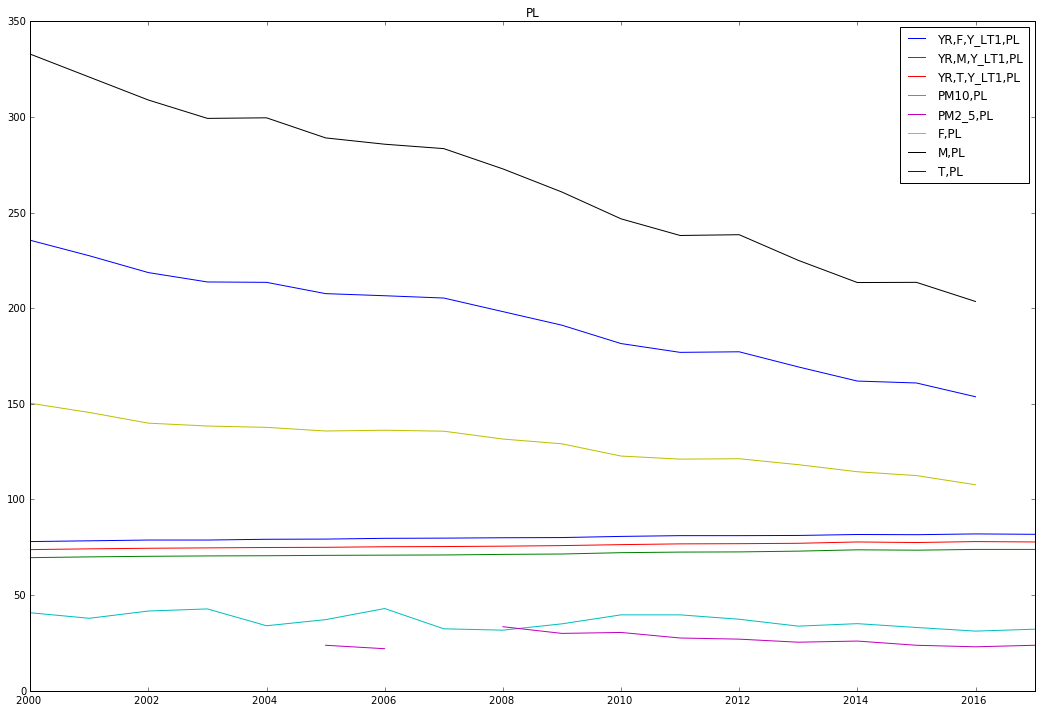

In [769]:
#Get PL data
#Create one entry per country
for country_abr in ['PL']:
    indexes_life = list(filter(lambda x: x.endswith(country_abr), life_expectancy_at_birth_by_sex.index.values.tolist()))
    a = life_expectancy_at_birth_by_sex.loc[indexes_life,].T
    a = a.applymap(lambda x: str(x).split(' ')[0])
    
    indexes_exposure_air = list(filter(lambda x: x.endswith(country_abr), exposure_to_air_pollution_by_particulate_matter.index.values.tolist()))
    b = exposure_to_air_pollution_by_particulate_matter.loc[indexes_exposure_air,].T
    b = b.applymap(lambda x: str(x).split(' ')[0])
    
#     indexes_good_perceived_health = list(filter(lambda x: x.endswith(country_abr), share_of_people_with_good_perceived_health.index.values.tolist()))
#     c = share_of_people_with_good_perceived_health.loc[indexes_good_perceived_health,].T
#     c = c.applymap(lambda x: str(x).split(' ')[0])
    
    indexes_death = list(filter(lambda x: x.endswith(country_abr), death_rate_to_chronic_diseases.index.values.tolist()))
    d = death_rate_to_chronic_diseases.loc[indexes_death,].T
    d = d.applymap(lambda x: str(x).split(' ')[0])

    joined = a.join(b)
    joined = joined.join(d)

    joined = joined.replace(": ", np.nan)
    pl_data = joined.replace(":", np.nan)
    for (columnName, columnData) in pl_data.iteritems():
        pl_data[columnName] = pd.to_numeric(pl_data[columnName])

    pl_data.plot(figsize = (18,12), title = country_abr)

In [770]:
pl_data.columns = ['life_exp_f','life_exp_m','life_exp_t','pm10','pm2_5', 
                     'death_to_chronic_f','death_to_chronic_m','death_to_chronic_t']
pl_data_complete = pl_data.loc['2005':'2017']
pl_data_complete

life_exp_f  life_exp_m  life_exp_t  pm10  pm2_5  death_to_chronic_f  \
2005         79.3        70.8        75.0  37.2   23.8               135.8   
2006         79.7        70.9        75.3  43.0   22.0               136.2   
2007         79.8        71.0        75.4  32.4    NaN               135.7   
2008         80.0        71.3        75.6  31.7   33.5               131.6   
2009         80.1        71.5        75.9  35.0   30.0               129.1   
2010         80.7        72.2        76.4  39.7   30.5               122.7   
2011         81.1        72.5        76.8  39.7   27.6               121.1   
2012         81.1        72.6        76.9  37.4   27.0               121.3   
2013         81.2        73.0        77.1  33.8   25.4               118.2   
2014         81.7        73.7        77.8  35.1   26.0               114.5   
2015         81.6        73.5        77.5  33.1   23.8               112.5   
2016         82.0        73.9        78.0  31.2   23.0               107.7   

       death_to_chronic_m  death_to_chronic_t  
2005                289.0               207.6  
2006                285.7               206.5  
2007                283.4               205.3  
2008                272.8               198.2  
2009                260.7               191.1  
2010                246.7               181.5  
2011                238.0               176.9  
2012                238.4               177.2  
2013                225.0               169.3  
2014                213.4               161.9  
2015                213.5               160.9  
2016                203.5               153.7

In [703]:
signal.correlate(pl_data_complete['life_exp_f'], pl_data_complete['pm10'], mode = "full")

array([ 2474.16,  5111.47,  7911.26, 10615.19, 13607.78, 16803.38,
       20013.82, 22854.33, 25435.23, 28087.51, 31580.23, 34630.27,
       32167.95, 29535.66, 26734.92, 24040.14, 21045.44, 17836.39,
       14612.32, 11776.98,  9204.84,  6561.52,  3050.4 ])

In [704]:
signal.correlate(pl_data_complete['life_exp_f'], pl_data_complete['pm2_5'], mode = "full")

array([ 1823.9 ,  3720.44,  5794.06,  7825.66,  9986.58, 12209.98,
       14673.53, 17100.55, 19808.31,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,  3746.08,  1951.6 ])

In [705]:
signal.correlate(pl_data_complete['death_to_chronic_f'], pl_data_complete['pm10'], mode = "full")

array([ 4236.96,  8744.42, 13508.64, 17968.25, 22829.43, 27792.41,
       32692.76, 36932.59, 40612.75, 44241.36, 49234.28, 53308.84,
       48980.23, 44390.99, 39592.62, 35024.35, 30198.24, 25393.34,
       20640.51, 16379.63, 12586.38,  8816.1 ,  4006.44])

In [706]:
signal.correlate(pl_data_complete['death_to_chronic_f'], pl_data_complete['pm2_5'], mode = "full")

array([ 3123.4 ,  6364.64,  9893.46, 13246.98, 16755.66, 20188.54,
       23969.72, 27668.04, 31762.73,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,  5046.9 ,  2563.26])

NFZ DATA get from api - https://api.nfz.gov.pl/app-stat-api-jgp/swagger-docs#/

In [707]:
r = requests.get('https://api.nfz.gov.pl/app-stat-api-jgp/benefits?benefit=oddechowy&catalog=1a')
r.text

'{"meta":{"@context":"https://api.nfz.gov.pl/app-stat-api-jgp/schemas/#benefit","count":2,"title":"benefit","page":1,"url":"https://api.nfz.gov.pl/app-stat-api-jgp/schema/benefit","limit":10,"provider":"Narodowy Fundusz Zdrowia","date-published":null,"date-modified":"2019-12-08T08:20:09+01:00","description":"Dane słownikowe świadczeń.","keywords":"Narodowy Fundusz Zdrowia,statystyka,statystyka NFZ,ststystyka świadczeń,statystyka JGP","language":"PL","content-type":"application/json; charset=utf-8","is-part-of":"Słowniki","version":null},"links":{"first":"/app-stat-api-jgp/benefits?page=1&limit=10&format=json&benefit=oddechowy","prev":null,"self":"/app-stat-api-jgp/benefits?page=1&limit=10&format=json&benefit=oddechowy","next":null,"last":"/app-stat-api-jgp/benefits?page=1&limit=10&format=json&benefit=oddechowy","related":null},"data":[{"code":"5.51.01.0014003","name":"P03 CHOROBY GÓRNEGO ODCINKA DRÓG ODDECHOWYCH"},{"code":"5.51.01.0014004","name":"P04 CHOROBY DOLNYCH DRÓG ODDECHOWYCH"}

In [708]:
pref = 'https://api.nfz.gov.pl/app-stat-api-jgp'

In [728]:
def collect_data_from_NFZ_api(pref, request):
    df = pd.DataFrame()
    years = []
    for year in request.json()['data']['attributes']['years']:
        for table_entry in year['tables']:
            link = table_entry['links']['related'] 
            r2 = requests.get(pref+link)
            if 'attributes' in r2.json()['data'] and r2.json()['data']['attributes'].get('header') == 'Dane ogólne':
                data = json.loads(r2.text)
                if df.empty:
                    df = json_normalize(data['data']['attributes']['data'])
                    years.append(r2.json()['data']['attributes']['year'])
                else:
                    df = pd.concat((df, json_normalize(data['data']['attributes']['data'])))
                    years.append(r2.json()['data']['attributes']['year'])

    df['year'] = years
    return df

In [729]:
#P03 CHOROBY GÓRNEGO ODCINKA DRÓG ODDECHOWYCH
r = requests.get('https://api.nfz.gov.pl/app-stat-api-jgp/index-of-tables?name=5.51.01.0014003&catalog=1a')
gorny_odcinek = collect_data_from_NFZ_api(pref,r)

In [730]:
#P04 CHOROBY DOLNYCH DRÓG ODDECHOWYCH
r = requests.get('https://api.nfz.gov.pl/app-stat-api-jgp/index-of-tables?name=5.51.01.0014004&catalog=1a')
dolny_odcinek = collect_data_from_NFZ_api(pref,r)

In [731]:
dolny_odcinek.rename(columns={'year':'time'}, inplace = True)
gorny_odcinek.rename(columns={'year':'time'}, inplace = True)
dolny_odcinek = dolny_odcinek.set_index('time')
gorny_odcinek = gorny_odcinek.set_index('time')

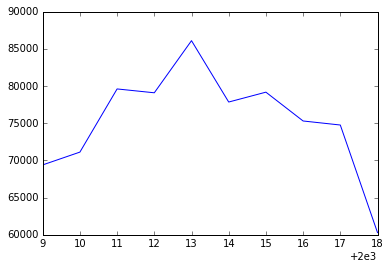

In [732]:
plt.plot(dolny_odcinek.index, dolny_odcinek['number-of-hospitalizations'])

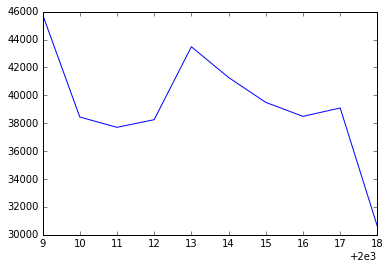

In [733]:
plt.plot(gorny_odcinek.index, gorny_odcinek['number-of-hospitalizations'])

AIRLY data about air pollution in Poland

In [734]:
airly = pd.read_csv('data-1/measurements.csv')

In [735]:
airly['time'] = pd.to_datetime(airly['time'])
airly['Year'] = pd.to_datetime(airly['time']).apply(lambda x: '{year}'.format(year=x.year))
airly.groupby(by=[airly['Year']]).mean()

id       pm10       pm25  temperature   humidity     pressure
Year                                                                        
2017   643.248212  69.929052  42.596467     1.580836  68.816371  1013.433882
2018  1147.806868  53.820701  31.277216     9.995728  74.610152  1017.080251
2019  4045.308752  44.598592  25.259539    10.694027  76.611221  1015.895955

Airly has to less data! we woll not use it

In [743]:
#data copied from European dataset
time = [i for i in range(2000, 2018, 1)]
d = {'pm_10' : [40.8,37.9,41.7,42.8,34,37.2,43,32.4,31.7,35,39.7,39.7,37.4,33.8,35.1,33.1,31.2,32.2],
     'pm_2' : [	np.nan, np.nan, np.nan, np.nan, np.nan, 23.8, 22, np.nan, 33.5, 30, 30.5, 27.6, 27, 25.4, 26, 23.8, 23, 23.8],
     'time' : time}

In [744]:
pm_pl = pd.DataFrame(data = d)

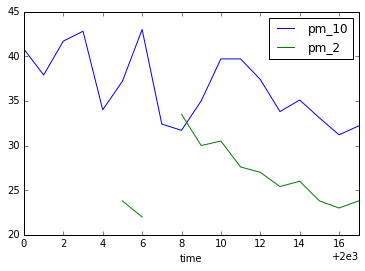

In [745]:
pm_pl = pm_pl.set_index("time")
pm_pl.plot()

Data about pm levels in poland joined with NFZ resporatory diseases

In [761]:
respiratory_diseases = gorny_odcinek.join(dolny_odcinek,  on = 'time', lsuffix = "_bottom",rsuffix = "_up")
respiratory_diseases_with_pm = respiratory_diseases.join(pm_pl)

In [762]:
#skip last - it is nan
respiratory_diseases_with_pm = respiratory_diseases_with_pm[:-1]
respiratory_diseases_with_pm

branch_bottom hospital-types_bottom  number-of-patients_bottom  \
time                                                                  
2009          None                  None                      44224   
2010          None                  None                      37217   
2011          None                  None                      36594   
2012          None                  None                      37156   
2013          None                  None                      42138   
2014          None                  None                      40022   
2015          None                  None                      38366   
2016          None                  None                      37460   
2017          None                  None                      37975   

      number-of-hospitalizations_bottom  ratio-of-rehospitalizations_bottom  \
time                                                                          
2009                              45797                                1.04   
2010                              38444                                1.03   
2011                              37703                                1.03   
2012                              38253                                1.03   
2013                              43480                                1.03   
2014                              41276                                1.03   
2015                              39493                                1.03   
2016                              38490                                1.03   
2017                              39092                                1.03   

      percentage_bottom  percentage-of-sections_bottom  \
time                                                     
2009               0.63                          10.95   
2010               0.54                           9.49   
2011               0.52                           8.99   
2012               0.53                           9.12   
2013               0.61                          10.00   
2014               0.57                           9.13   
2015               0.55                           8.73   
2016               0.55                           8.56   
2017               0.55                           8.78   

      duration-of-hospitalization-mediana_bottom  \
time                                               
2009                                           4   
2010                                           4   
2011                                           3   
2012                                           3   
2013                                           3   
2014                                           3   
2015                                           3   
2016                                           3   
2017                                           3   

      duration-of-hospitalization-mode_bottom  \
time                                            
2009                                        2   
2010                                        2   
2011                                        2   
2012                                        2   
2013                                        2   
2014                                        2   
2015                                        2   
2016                                        2   
2017                                        2   

      average-value-of-hospitalization_bottom  ...  percentage_up  \
time                                           ...                  
2009                                  1166.61  ...           0.95   
2010                                  1186.40  ...           0.99   
2011                                  1208.28  ...           1.11   
2012                                  1236.12  ...           1.10   
2013                                  1265.60  ...           1.20   
2014                                  1279.44  ...           1.08   
2015                                  1288.20  ..

In [763]:
signal.correlate(respiratory_diseases_with_pm['number-of-patients_bottom'], respiratory_diseases_with_pm['pm_2'], mode = "full")

array([1052531.2, 1902916.6, 2779459.4, 3761563.4, 4819341.2, 5896814.2,
       6957486.2, 8129899.2, 9264417.9, 8174906.4, 7326942.2, 6479212.2,
       5519697.6, 4430044. , 3341620. , 2282037.5, 1139250. ])

In [764]:
signal.correlate(respiratory_diseases_with_pm['number-of-patients_up'], respiratory_diseases_with_pm['pm_2'], mode = "full")

array([ 1544905.6,  3071463.4,  4838674.6,  6733134. ,  8746990.4,
       10699950.4, 12721708. , 14875403.4, 16978157.7, 15504337.2,
       14022793.5, 12262355.3, 10331987.5,  8260222.9,  6288350.4,
        4246632. ,  2099520. ])

In [765]:
signal.correlate(respiratory_diseases_with_pm['number-of-patients_up'], respiratory_diseases_with_pm['pm_10'], mode = "full")

array([ 2090166.4,  4160855. ,  6610324.8,  9170379.9, 11865388.7,
       14562857.7, 17453056.2, 20268769.1, 22764782.7, 20755986.4,
       18709496.6, 16242627. , 13612647. , 10881050.7,  8151118.6,
        5242504.8,  2449440. ])

In [766]:
signal.correlate(respiratory_diseases_with_pm['number-of-patients_bottom'], respiratory_diseases_with_pm['pm_10'], mode = "full")

array([ 1424012.8,  2578176.2,  3803311.6,  5122301.1,  6528460.1,
        8029639.2,  9567500.8, 11064699.3, 12358269.3, 10930567.4,
        9794173.9,  8596170.9,  7271392.6,  5831327.2,  4337579.5,
        2818707.5,  1329125. ])